## **Введение в анализ данных**
## **НИУ ВШЭ, 2019-2020 учебный год**
### **Домашнее задание №5**
Задание выполнила: Густомясова Софья 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# 0. Загрузка данных

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
DATA_DIR = os.path.join('Downloads/data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [ ]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [ ]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [ ]:
table_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [ ]:
table_data.shape

(990, 194)

## Создание контрольного и обучающих множеств (1 балл)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
random_seed=42

С помощью LabelEncoder закодируем столбец species

In [ ]:
le=LabelEncoder()
y=le.fit_transform(table_data['species'])

В переменную X запишем значения признаков margin, shape, texture

In [ ]:
X = table_data.drop(['species','id'],axis=1).to_numpy()
X.shape

(990, 192)

Для дальнейшей работы с картинками также сохраним отдельно столбец id

In [ ]:
ID=table_data['id'].to_numpy(dtype=int)

Разделим данные на train и test

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=99*2, random_state=random_seed)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    break

Проверим, что в y_test ровно по два объекта каждого класса, для этого преобразуем этот столбец в DataFrame

In [ ]:
data=pd.DataFrame(y_test,columns=['species'])

Воспользуемся методом value_counts

In [ ]:
f=data['species'].value_counts()
print('Количество классов в y_test: ', f.shape)
print('Классы, которые представлены не двумя объектами: ',f[f!=2])

Количество классов в y_test:  (99,)
Классы, которые представлены не двумя объектами:  Series([], Name: species, dtype: int64)


Как видно, представлены все классы,  и классов, представленных не двумя объектами, нет.

Теперь загрузим картинки. В папке images лежат 1584 изображения в градациях серого различного размера.

In [ ]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


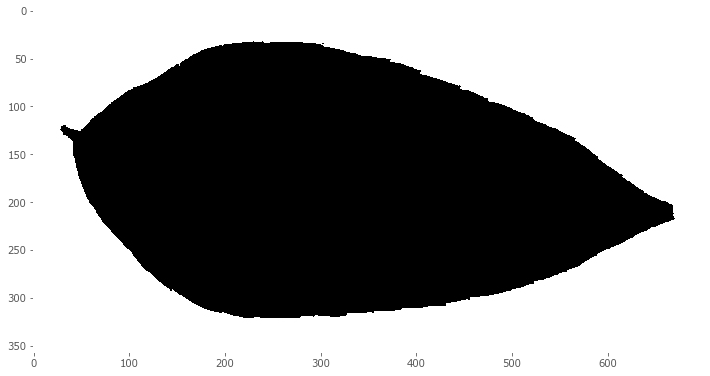

In [ ]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [ ]:
from skimage.transform import resize

In [ ]:
img_resized = resize(img, (100, 100))

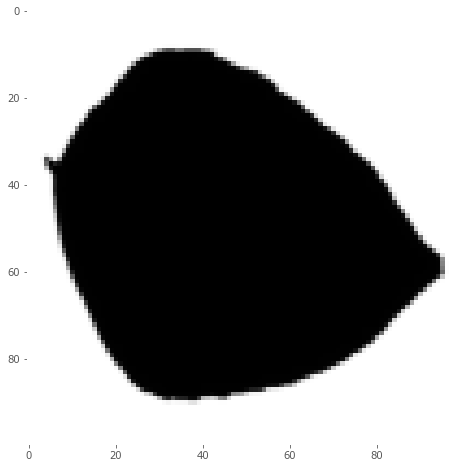

In [ ]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)

Я решила, загружать файлы  в порядке id из таблицы. То есть я создаю массив images, в котором каждая строчка это изображение листа соответствующей строчки таблицы (или массива X, потому что в нем сохраняется тот же порядок элементов, что и в таблице).  

In [ ]:
images=np.empty((990,10000))
for i, im in enumerate(ID):
    filepath = os.path.join(IMG_DIR, str(im)+'.jpg')
    img = plt.imread(filepath)
    img= resize(img, (100, 100))
    images[i]=np.ravel(img)

Изобразим первый элемент масссива, чтобы проверить, что все преобразовалось правильно

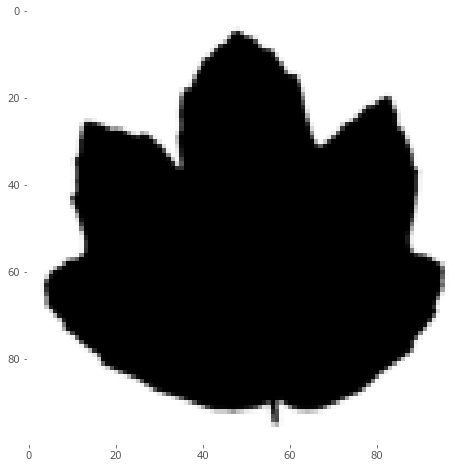

In [ ]:
plt.imshow(images[0].reshape((100,100)), cmap='Greys')
plt.grid(None)

Теперь разобьем массив images на train и test по индексам, полученным при разбеинии табличных данных

In [ ]:
imgs_train, imgs_test = images[train_index], images[test_index]

# 1. Visualization

## Простая визуализация (1 балл код +1 балл выводы)

Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)

Так как у нас равномерное распределение объеков между классами (по 10 объектов каждог класса в таблице) опять с помощью StratifiedShuffleSplit разделим обучающую выборку, так чтобы выделить по одному объекту каждого класса.

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=99, random_state=random_seed)
for train_index_new, test_index_new in sss.split(imgs_train, y_train):
    imgs_class = imgs_train[test_index_new]
    y_class =  y_train[test_index_new]
    break

Теперь в переменной y_class находится по 1 классу, а в img_class их пиксельные представления

In [ ]:
print('Размер y_class: ', len(y_class))
print('Размер сета из y_class: ', len(set(y_class)))

Размер y_class:  99
Размер сета из y_class:  99


Так как в переменной y_class 99 чисел и размер множества от этой y_class тоже 99, то все числа в y_class различны

Теперь отобразим листы каждого класса, добавим подписи - метки класса

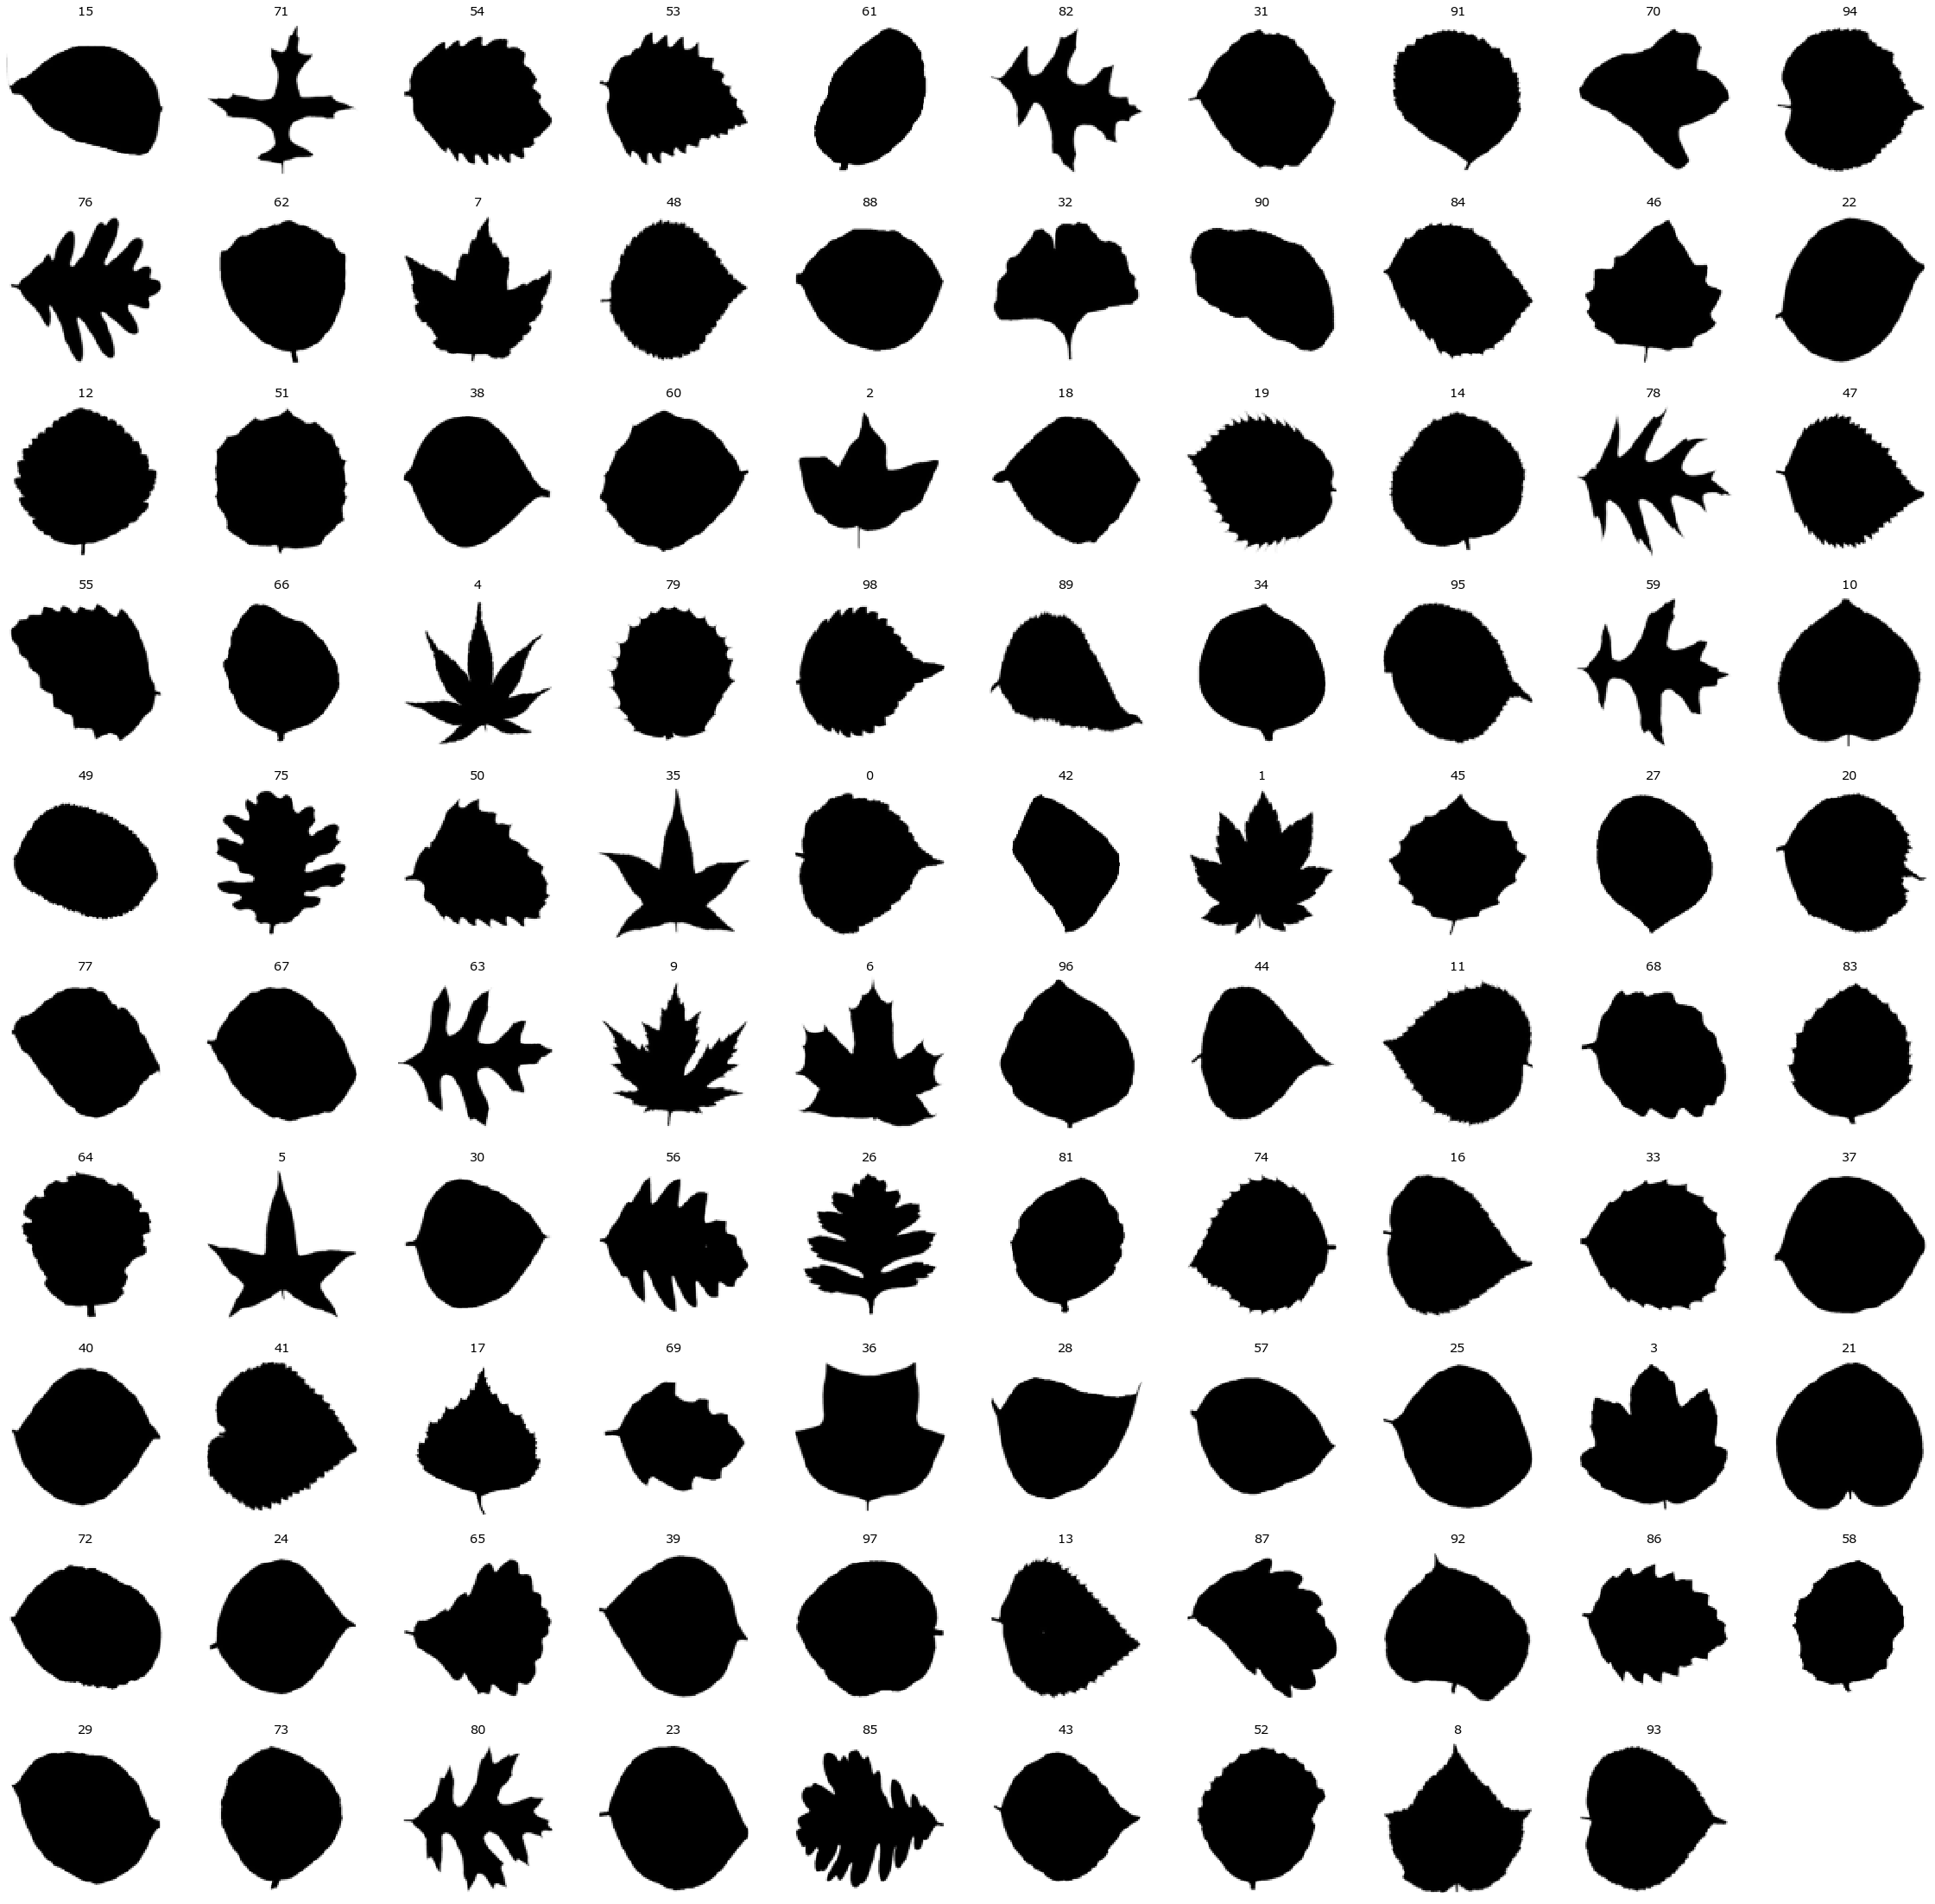

In [ ]:
plt.figure(figsize=(40,40))
for i in range(0, 99): 
    plt.subplot(10, 10, i+1)
    plt.imshow(imgs_class[i].reshape((100,100)), cmap='Greys')
    plt.title(y_class[i])
    plt.grid(None)
    plt.axis("off")

Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)

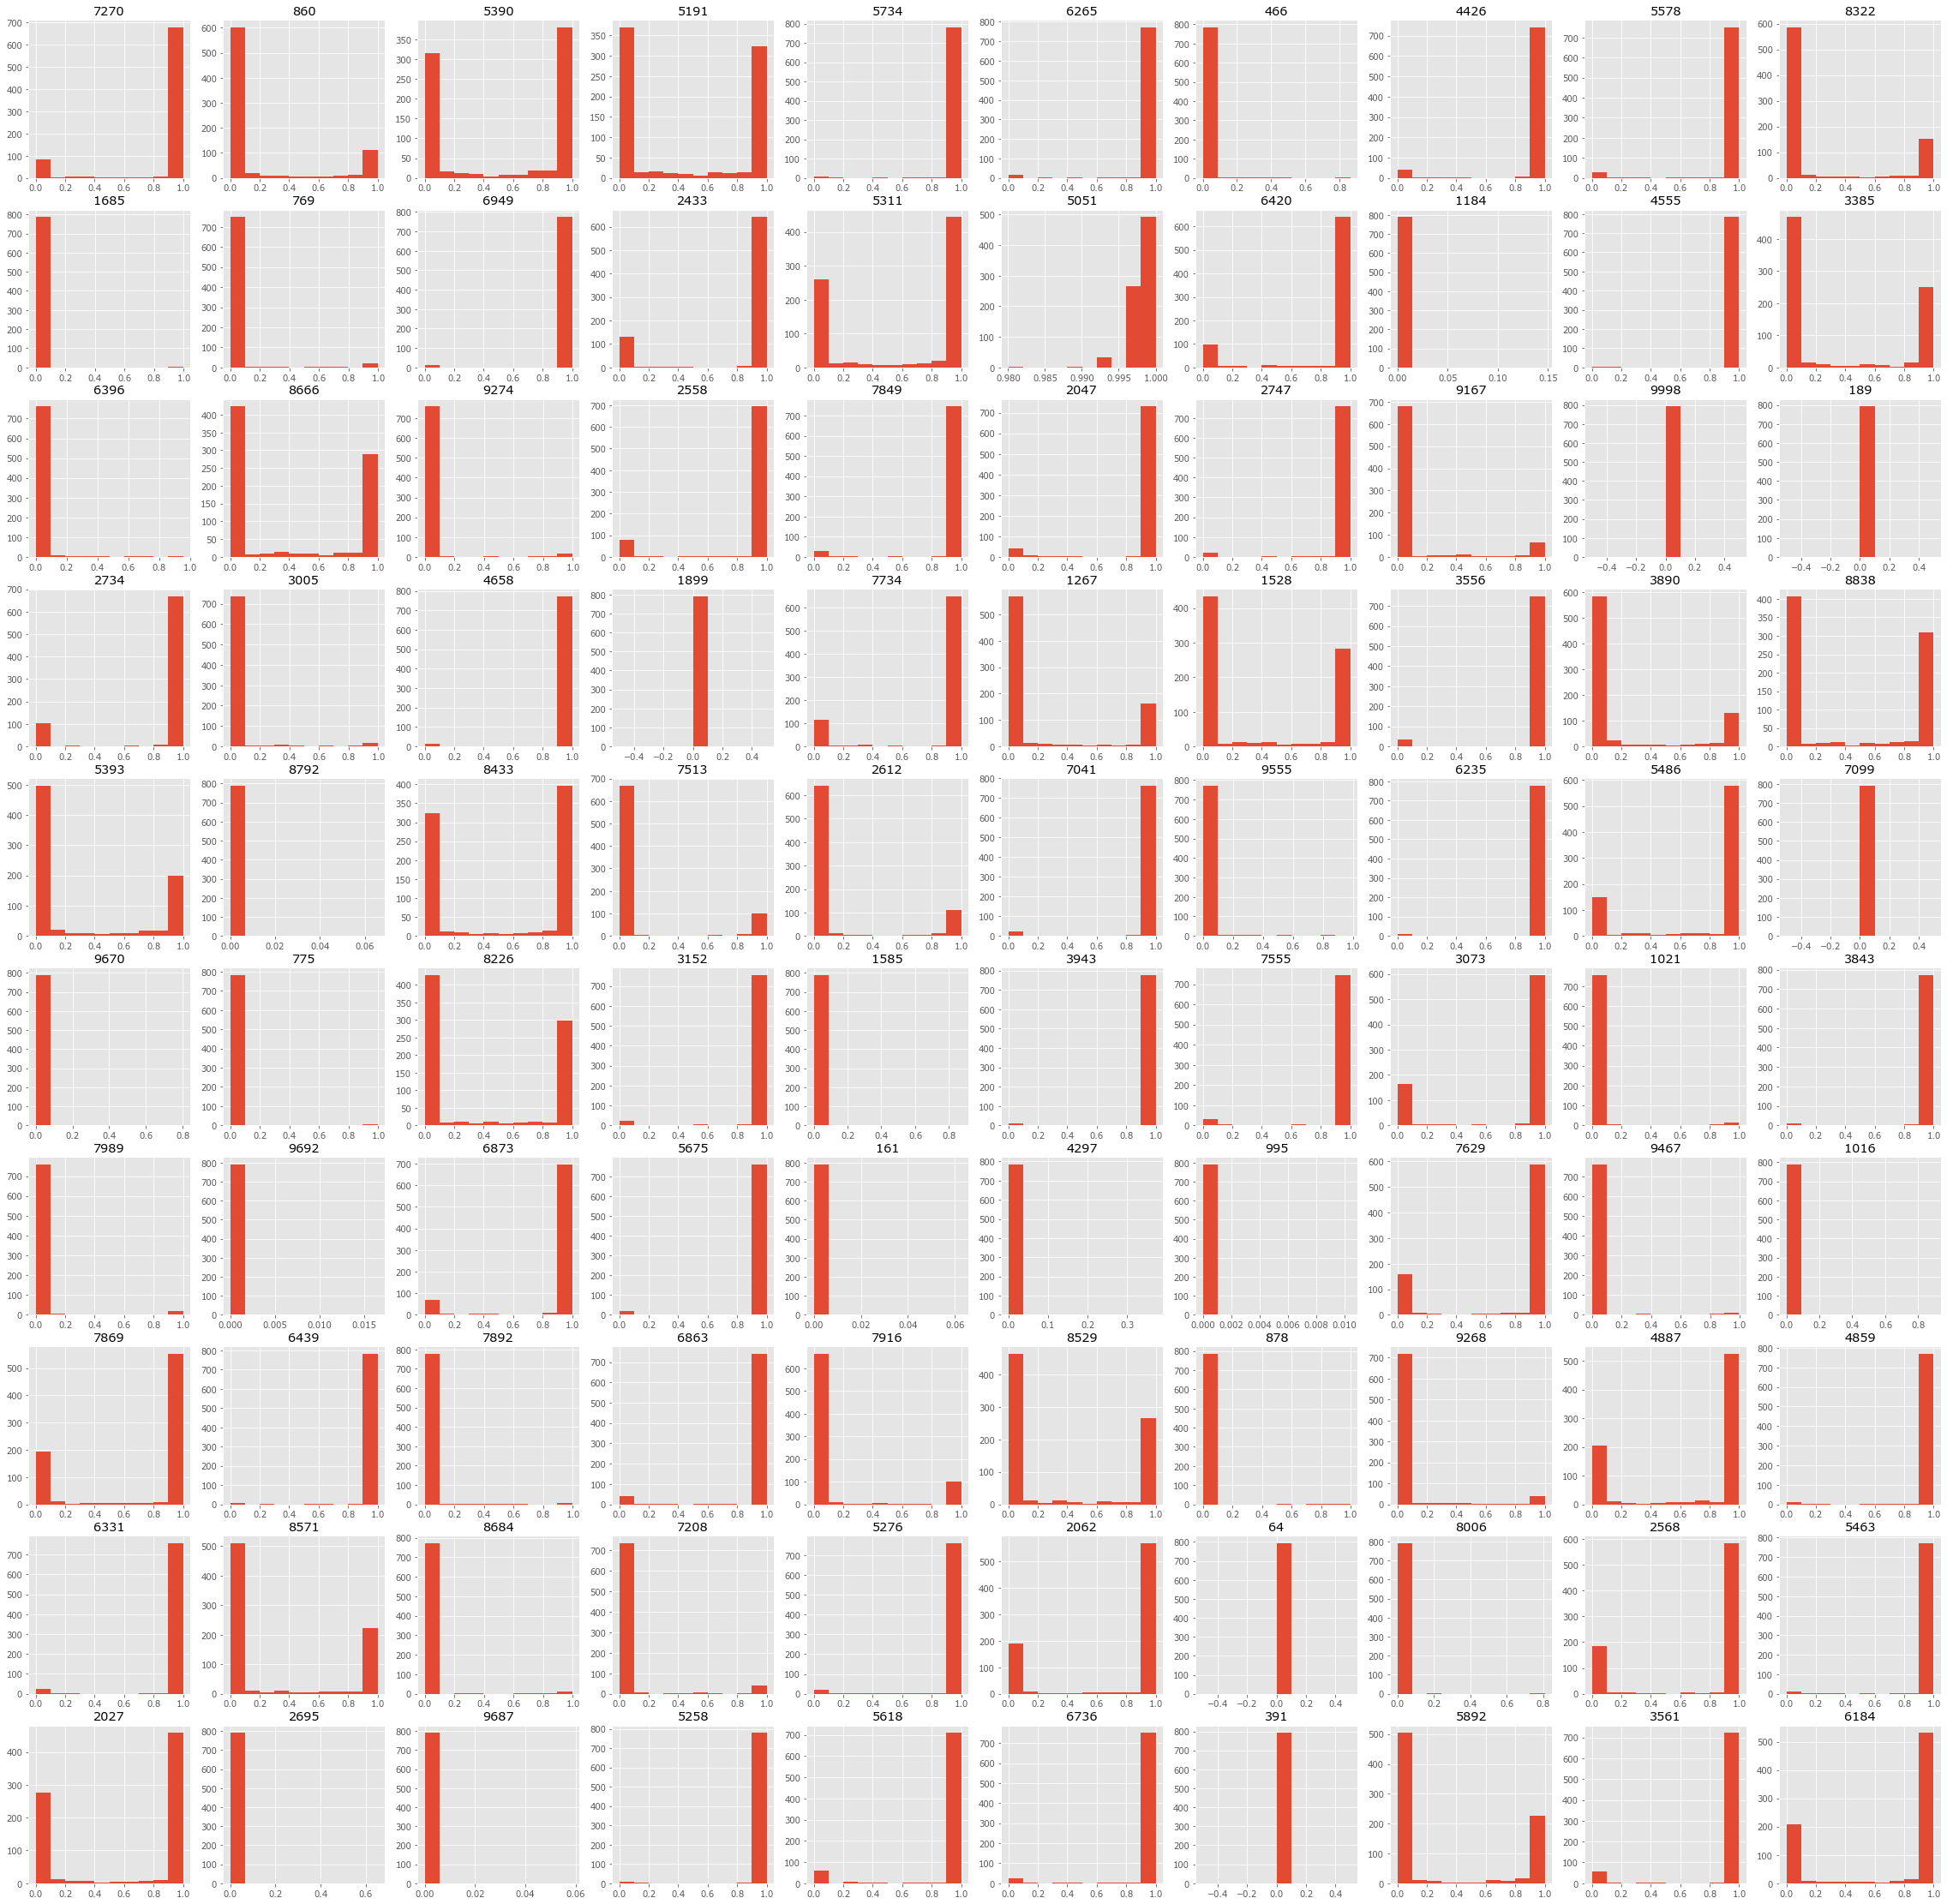

In [ ]:
plt.figure(figsize=(40,40))
np.random.seed(random_seed)
for i in range(0, 100):
    j=np.random.randint(0,10000)
    plt.subplot(10, 10, i+1)
    plt.hist(imgs_train[:,j])
    plt.title(j)

Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Для построениия среднего листа я беру среднее значение по каждому столбцу массива imgs_train

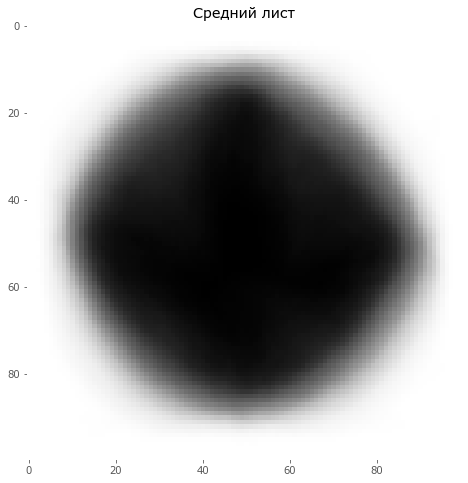

In [ ]:
mean_leaf=imgs_train.mean(axis=0).reshape((100,100))
plt.imshow(mean_leaf, cmap='Greys')
plt.grid(None)
plt.title('Средний лист')
plt.show()

Для построениия разброс каждого пикселя я беру std по каждому столбцу массива imgs_train

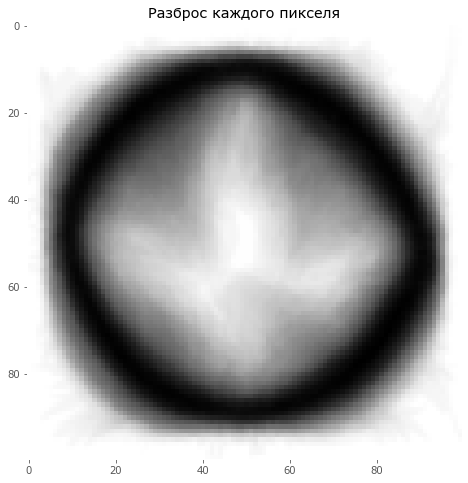

In [ ]:
std_leaf=imgs_train.std(axis=0).reshape((100,100))
plt.imshow(std_leaf, cmap='Greys')
plt.grid(None)
plt.title('Разброс каждого пикселя')
plt.show()

**Ответы на вопросы:**

**Можно ли отличить листья разных классов визуально?**   
Некоторые классы можно отличить визуально, потому что они имеют ярко выраженную форму, отличающуюся от других классов.  
**Можете ли вы выделить группы похожих классов?**  
Да, например, 23, 39 и 43. В основном это те классы, листья, которых имеют форму близкую к кругу или овалу.

**Каковы минимальное/максимальное значения признаков?**  
минимальное 0, максимальное 1.  
**Какого множество значений признаков? Какие значения чаще всего принимают признаки?**  
Множество значений - промежуток [0,1]. Чаще всего признаки принимают значения 0, 1 (видно из гистограм)  
**Похожи ли распределения разных признаков между собой?**  
Да, среди признаков можно выделить группы с похожими распределениями (гистограмами). Например, те признаки, которые в основном принимают 0 значения или, наоборот, значения, равные 1.

**Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?**

Попробуем забиниризовать первый листик из imgs_train с разными порогами, посмотрим что измениться

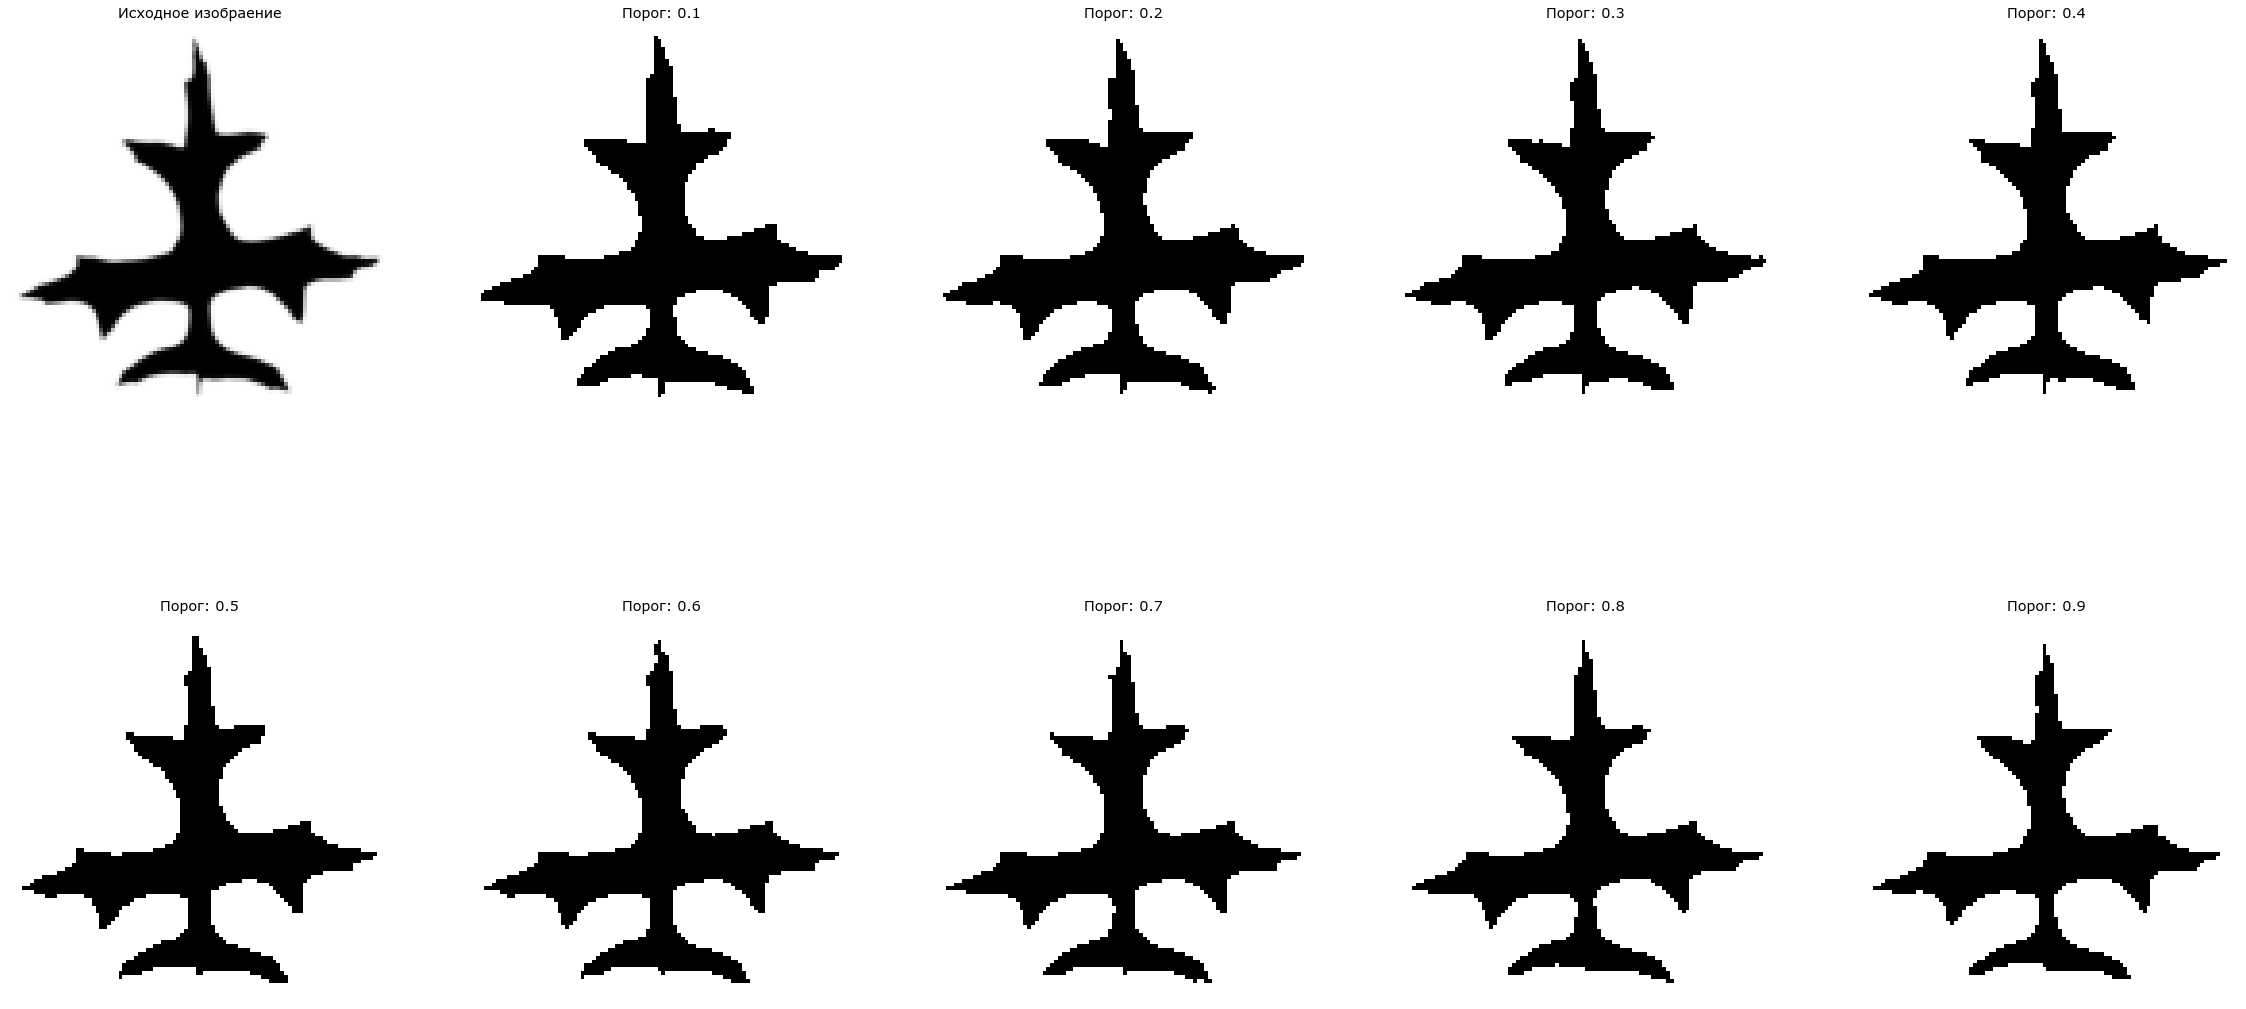

In [ ]:
plt.figure(figsize=(40,20))
t_range=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
leaf=imgs_train[0]
plt.subplot(2, 5, 1)
plt.imshow(leaf.reshape((100,100)), cmap='Greys')
plt.title('Исходное изобраение')
plt.grid(None)
plt.axis("off")
for i,t in enumerate(t_range):
    plt.subplot(2, 5, i+2)
    bin_leaf = (leaf > t).astype(int).reshape((100,100))
    plt.imshow(bin_leaf, cmap='Greys')
    plt.title('Порог: '+ str(t))
    plt.grid(None)
    plt.axis("off")
plt.show()

Как видно, бинаризация делает границы листка более четкими, так как нам важна только форма листка, то да, можно забиниризовать без большой потери данных. Порог особо значения не имеет, это видно из картинок, но я бы взяла 0.5 как среднее значение признака.

**Похож ли "средний лист" на обычный лист? Как вы думаете, почему?**   
Средний лист не похож на обычный лист, потому что при его построение бралось среднее значение каждого пикселя, а, так как листы имеют разную форму, четкие границы формы стерлись  
**Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)?**  
Если посмотреть на разброс признаков, то, там где светлые области, те признаки принимают константные признаки, визуально площадь этой области достаточно большая, так что да, призаков принимающие константые (или почти константые) значения много

# 2. Exploration

## Понижение размерности (1 балл код + 1 балл выводы)

Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster_centers_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters = 9, random_state=random_seed)
k_means = k_means.fit(imgs_train)
clusters = k_means.predict(imgs_train)
centers=k_means.cluster_centers_

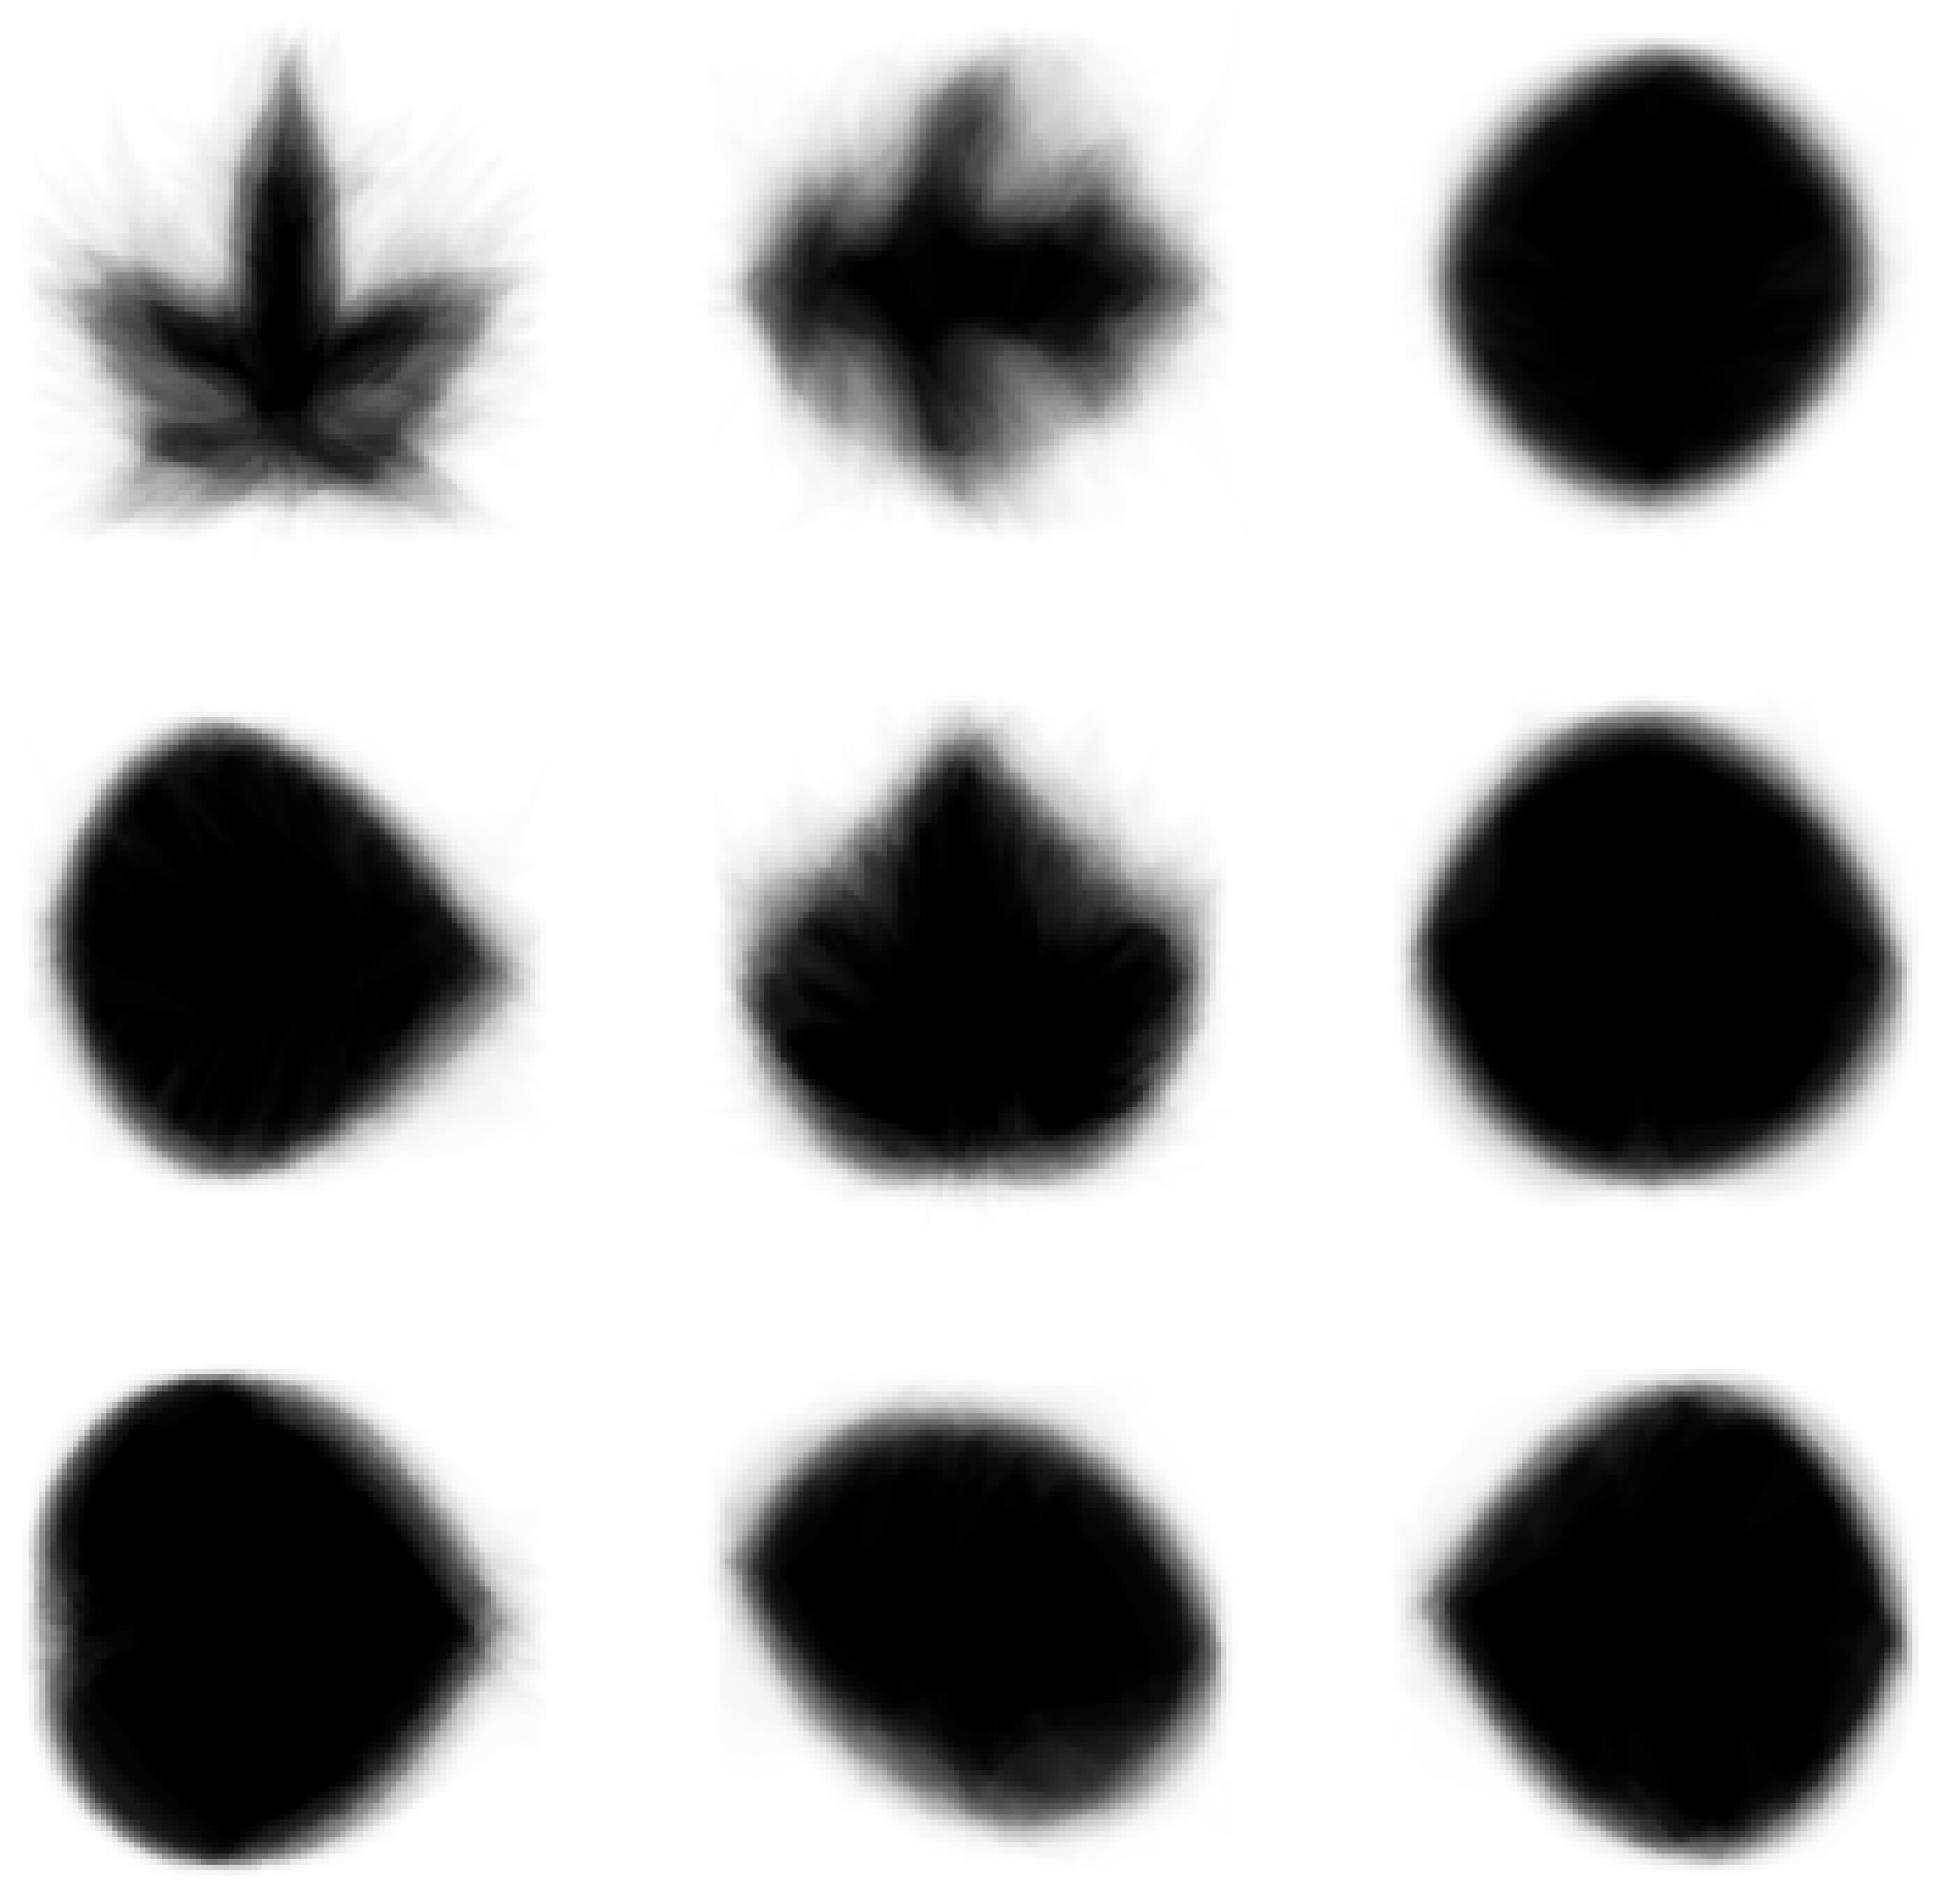

In [ ]:
plt.figure(figsize=(40,40))
for i in range(1, 10): 
    plt.subplot(3, 3, i)
    plt.imshow(centers[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")

Повторите предыдущие действия для 25 и 100 кластеров

In [ ]:
k_means = KMeans(n_clusters = 25, random_state=42)
k_means = k_means.fit(imgs_train)
clusters = k_means.predict(imgs_train)
centers=k_means.cluster_centers_

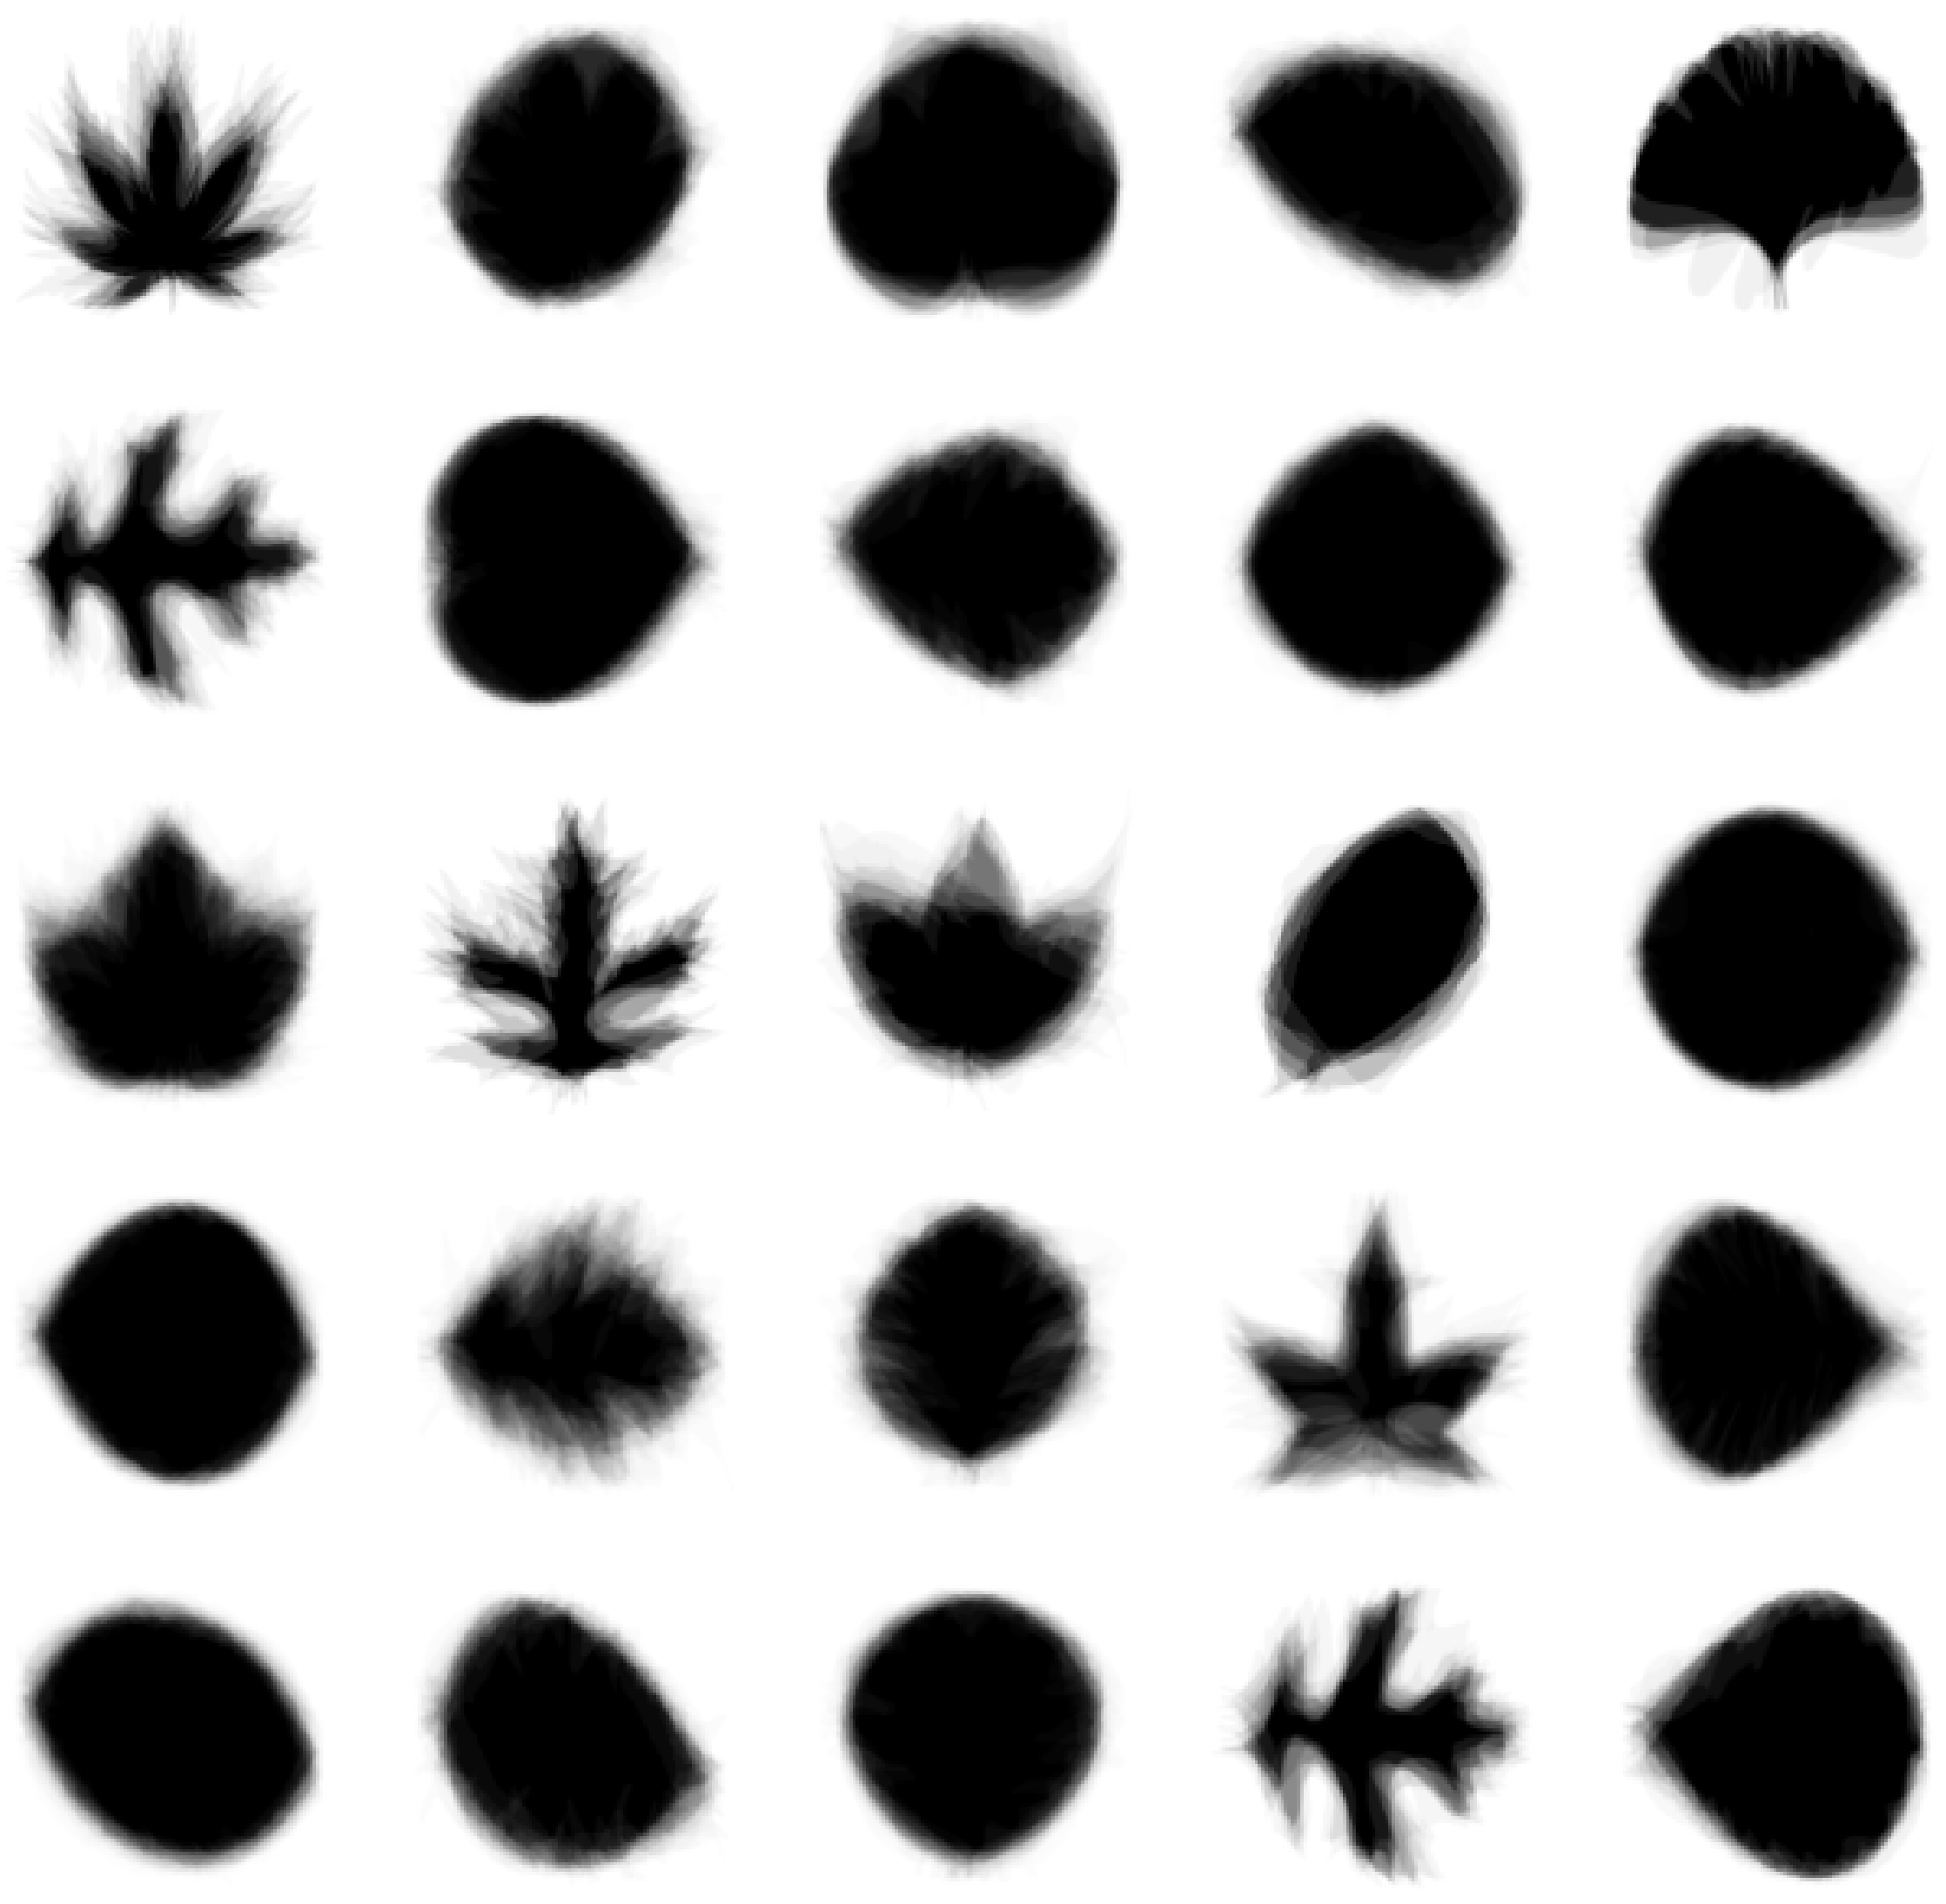

In [ ]:
plt.figure(figsize=(40,40))
for i in range(1, 26): 
    plt.subplot(5, 5, i)
    plt.imshow(centers[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")

In [ ]:
k_means = KMeans(n_clusters = 100, random_state=42)
k_means = k_means.fit(imgs_train)
clusters = k_means.predict(imgs_train)
centers=k_means.cluster_centers_

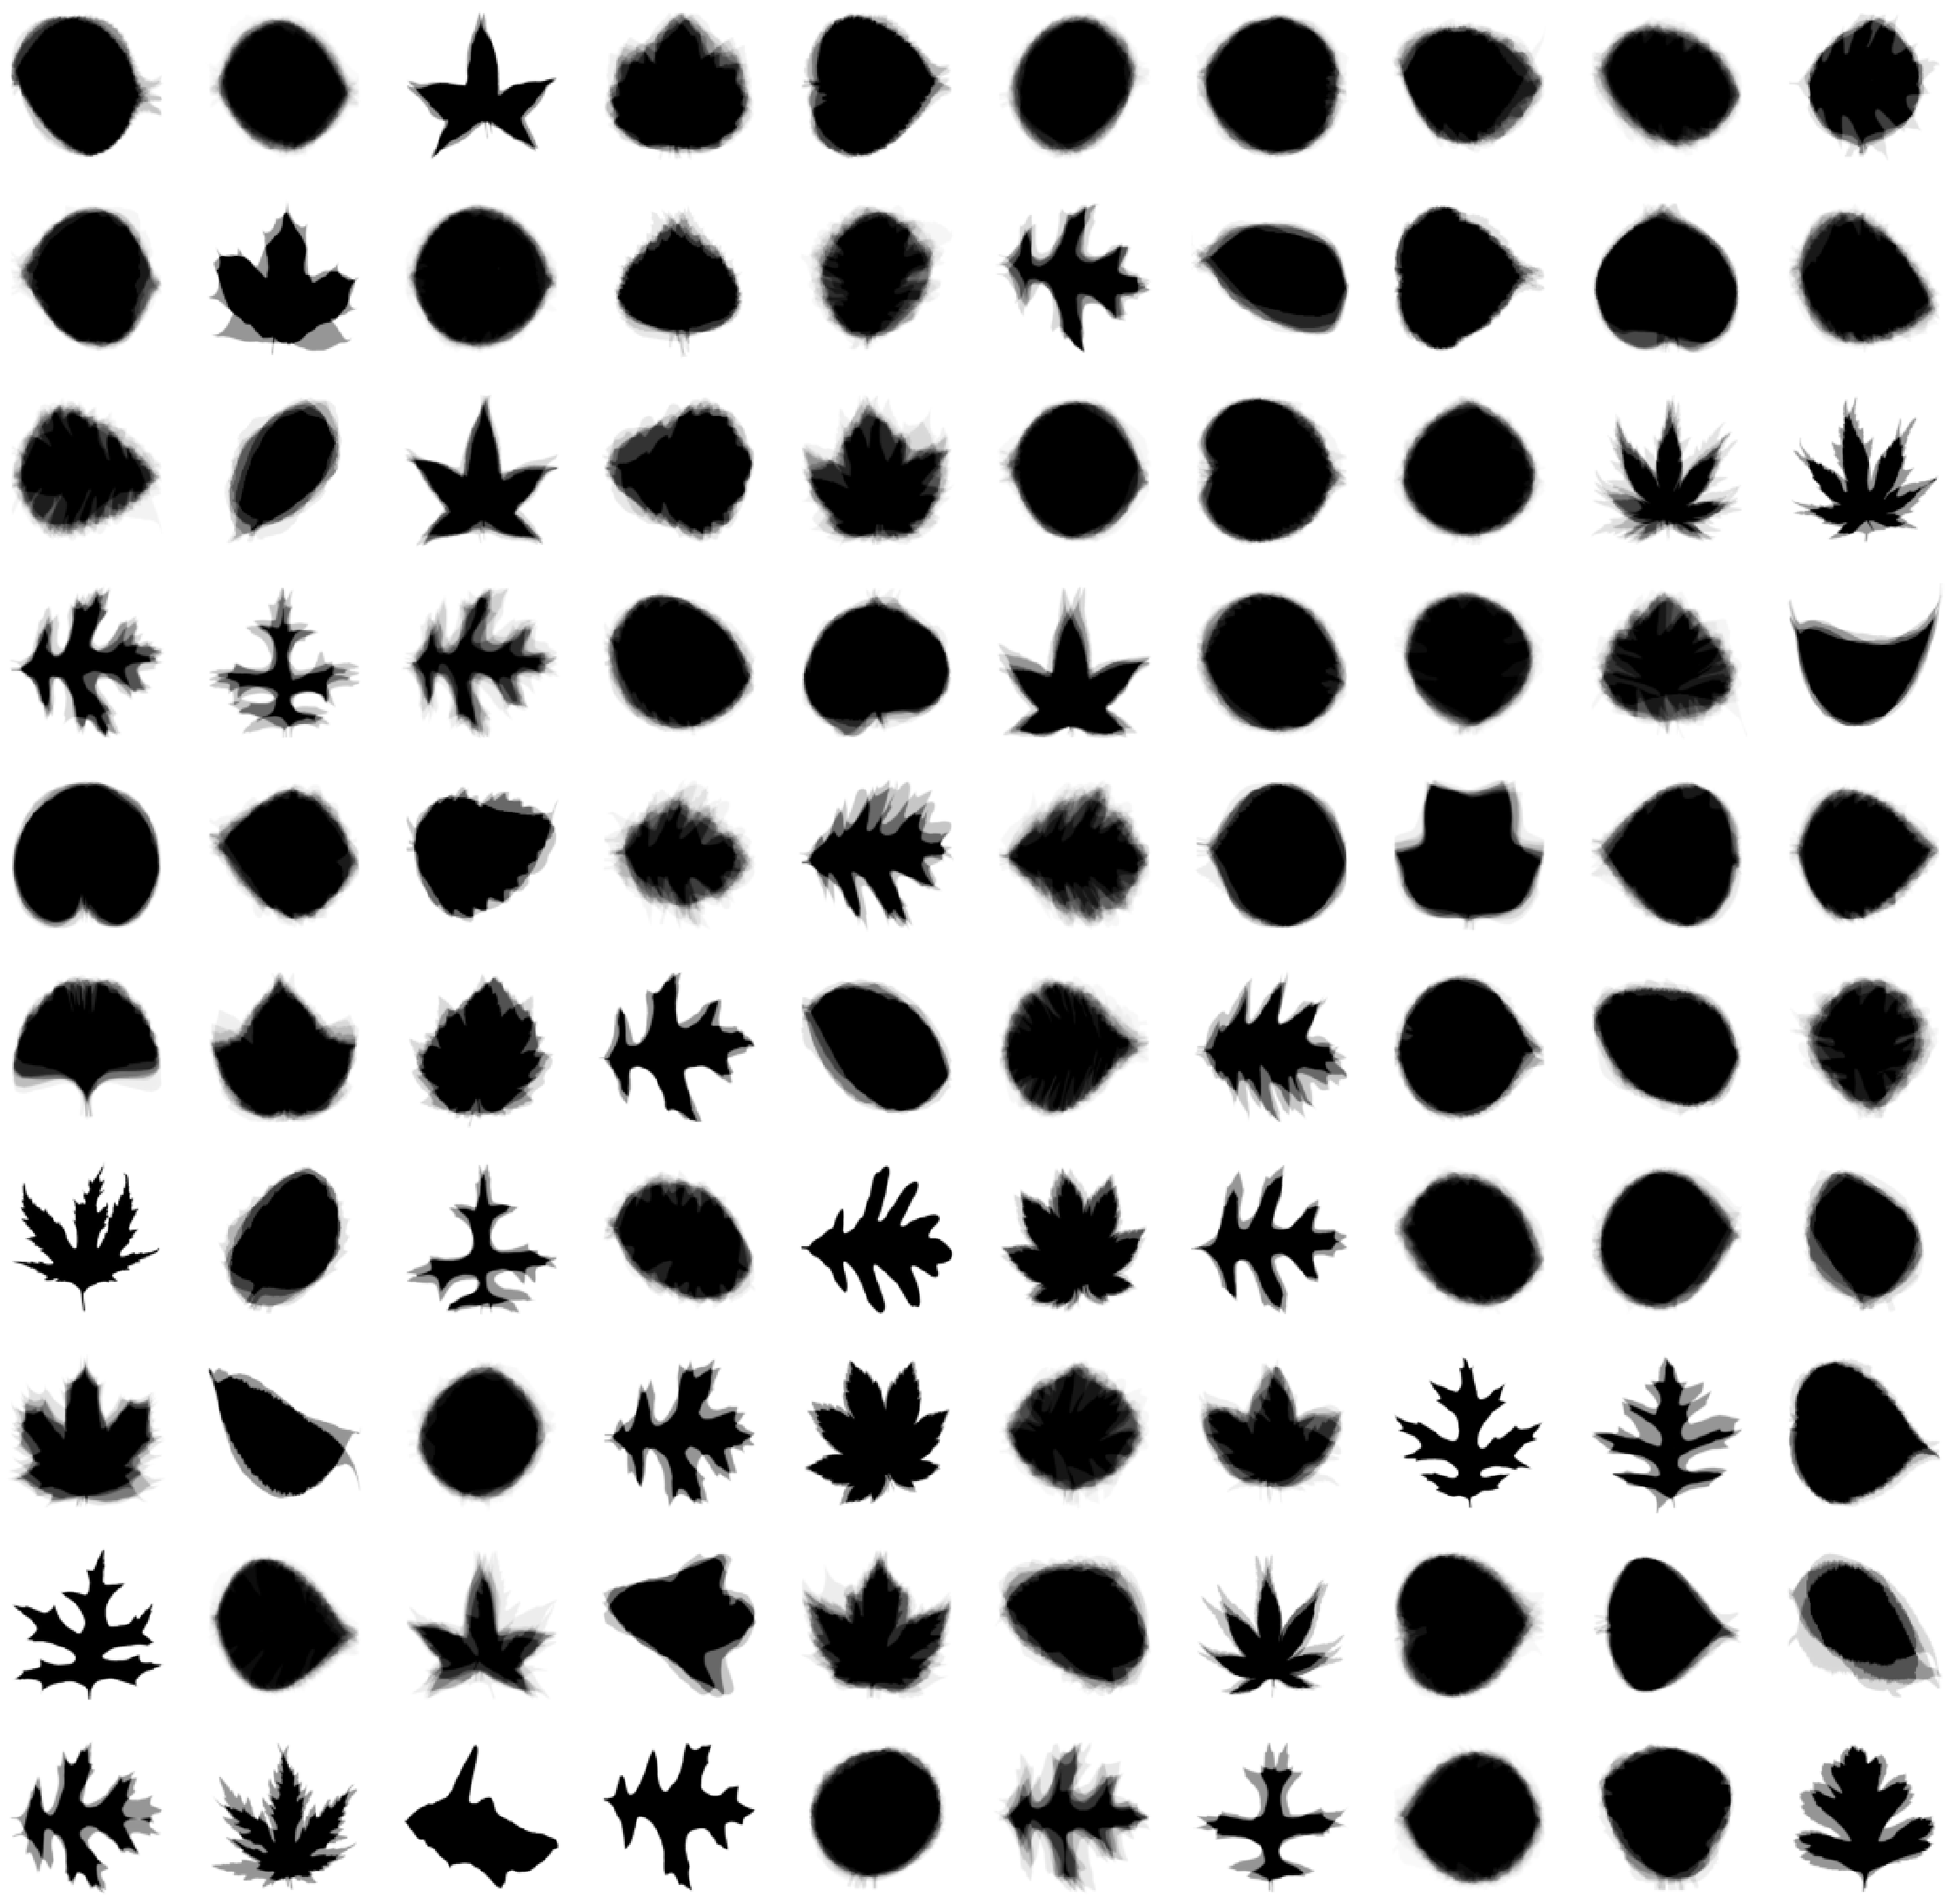

In [ ]:
plt.figure(figsize=(40,40))
for i in range(1, 101): 
    plt.subplot(10, 10, i)
    plt.imshow(centers[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")

**Ответьте на вопросы:**

**Похожи ли центры кластеров на листья?**  
Видно, что с увелечением числа кластеров, центры становятся все болле похожими на листья. При n=9 видно, что центры очень расплывчивы и отдалено по форме напоминают листья, при n=25 некоторые центры близки к изображениям листьев, только опять в расплывчитой форме, ну и при n=100 большинство центров похожи на листья

**В чем отличие от картинок листьев? В чем причина этого отличия?**  
Границы изображений расплывчаты, потому что алгоритм при построении центров берет среднии значения признаков.

**Есть ли среди кластеров похожие (или повторяющиеся)?**  
Да (kmeans зависит от выбора исходных центров кластеров, то есть если в исходных центрах были одинаковые классы, то это может привести к тому что и в итоге в центрах останутся объекты одного класса)

**Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?**  
Лучше всего подходит n=100, потому что оно ближе всего к реальному значению количества классов (99)

# 3. Prediction

In [ ]:
from sklearn.metrics import accuracy_score

## 3 классификатора (1 балл код + 1 балл выводы)

Начнем с примитивного метрического классификатора - центроидного. Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
nc= NearestCentroid()
nc.fit(imgs_train, y_train)
y_pred=nc.predict(imgs_test)
accuracy_score(y_pred,y_test)

0.5505050505050505

Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.

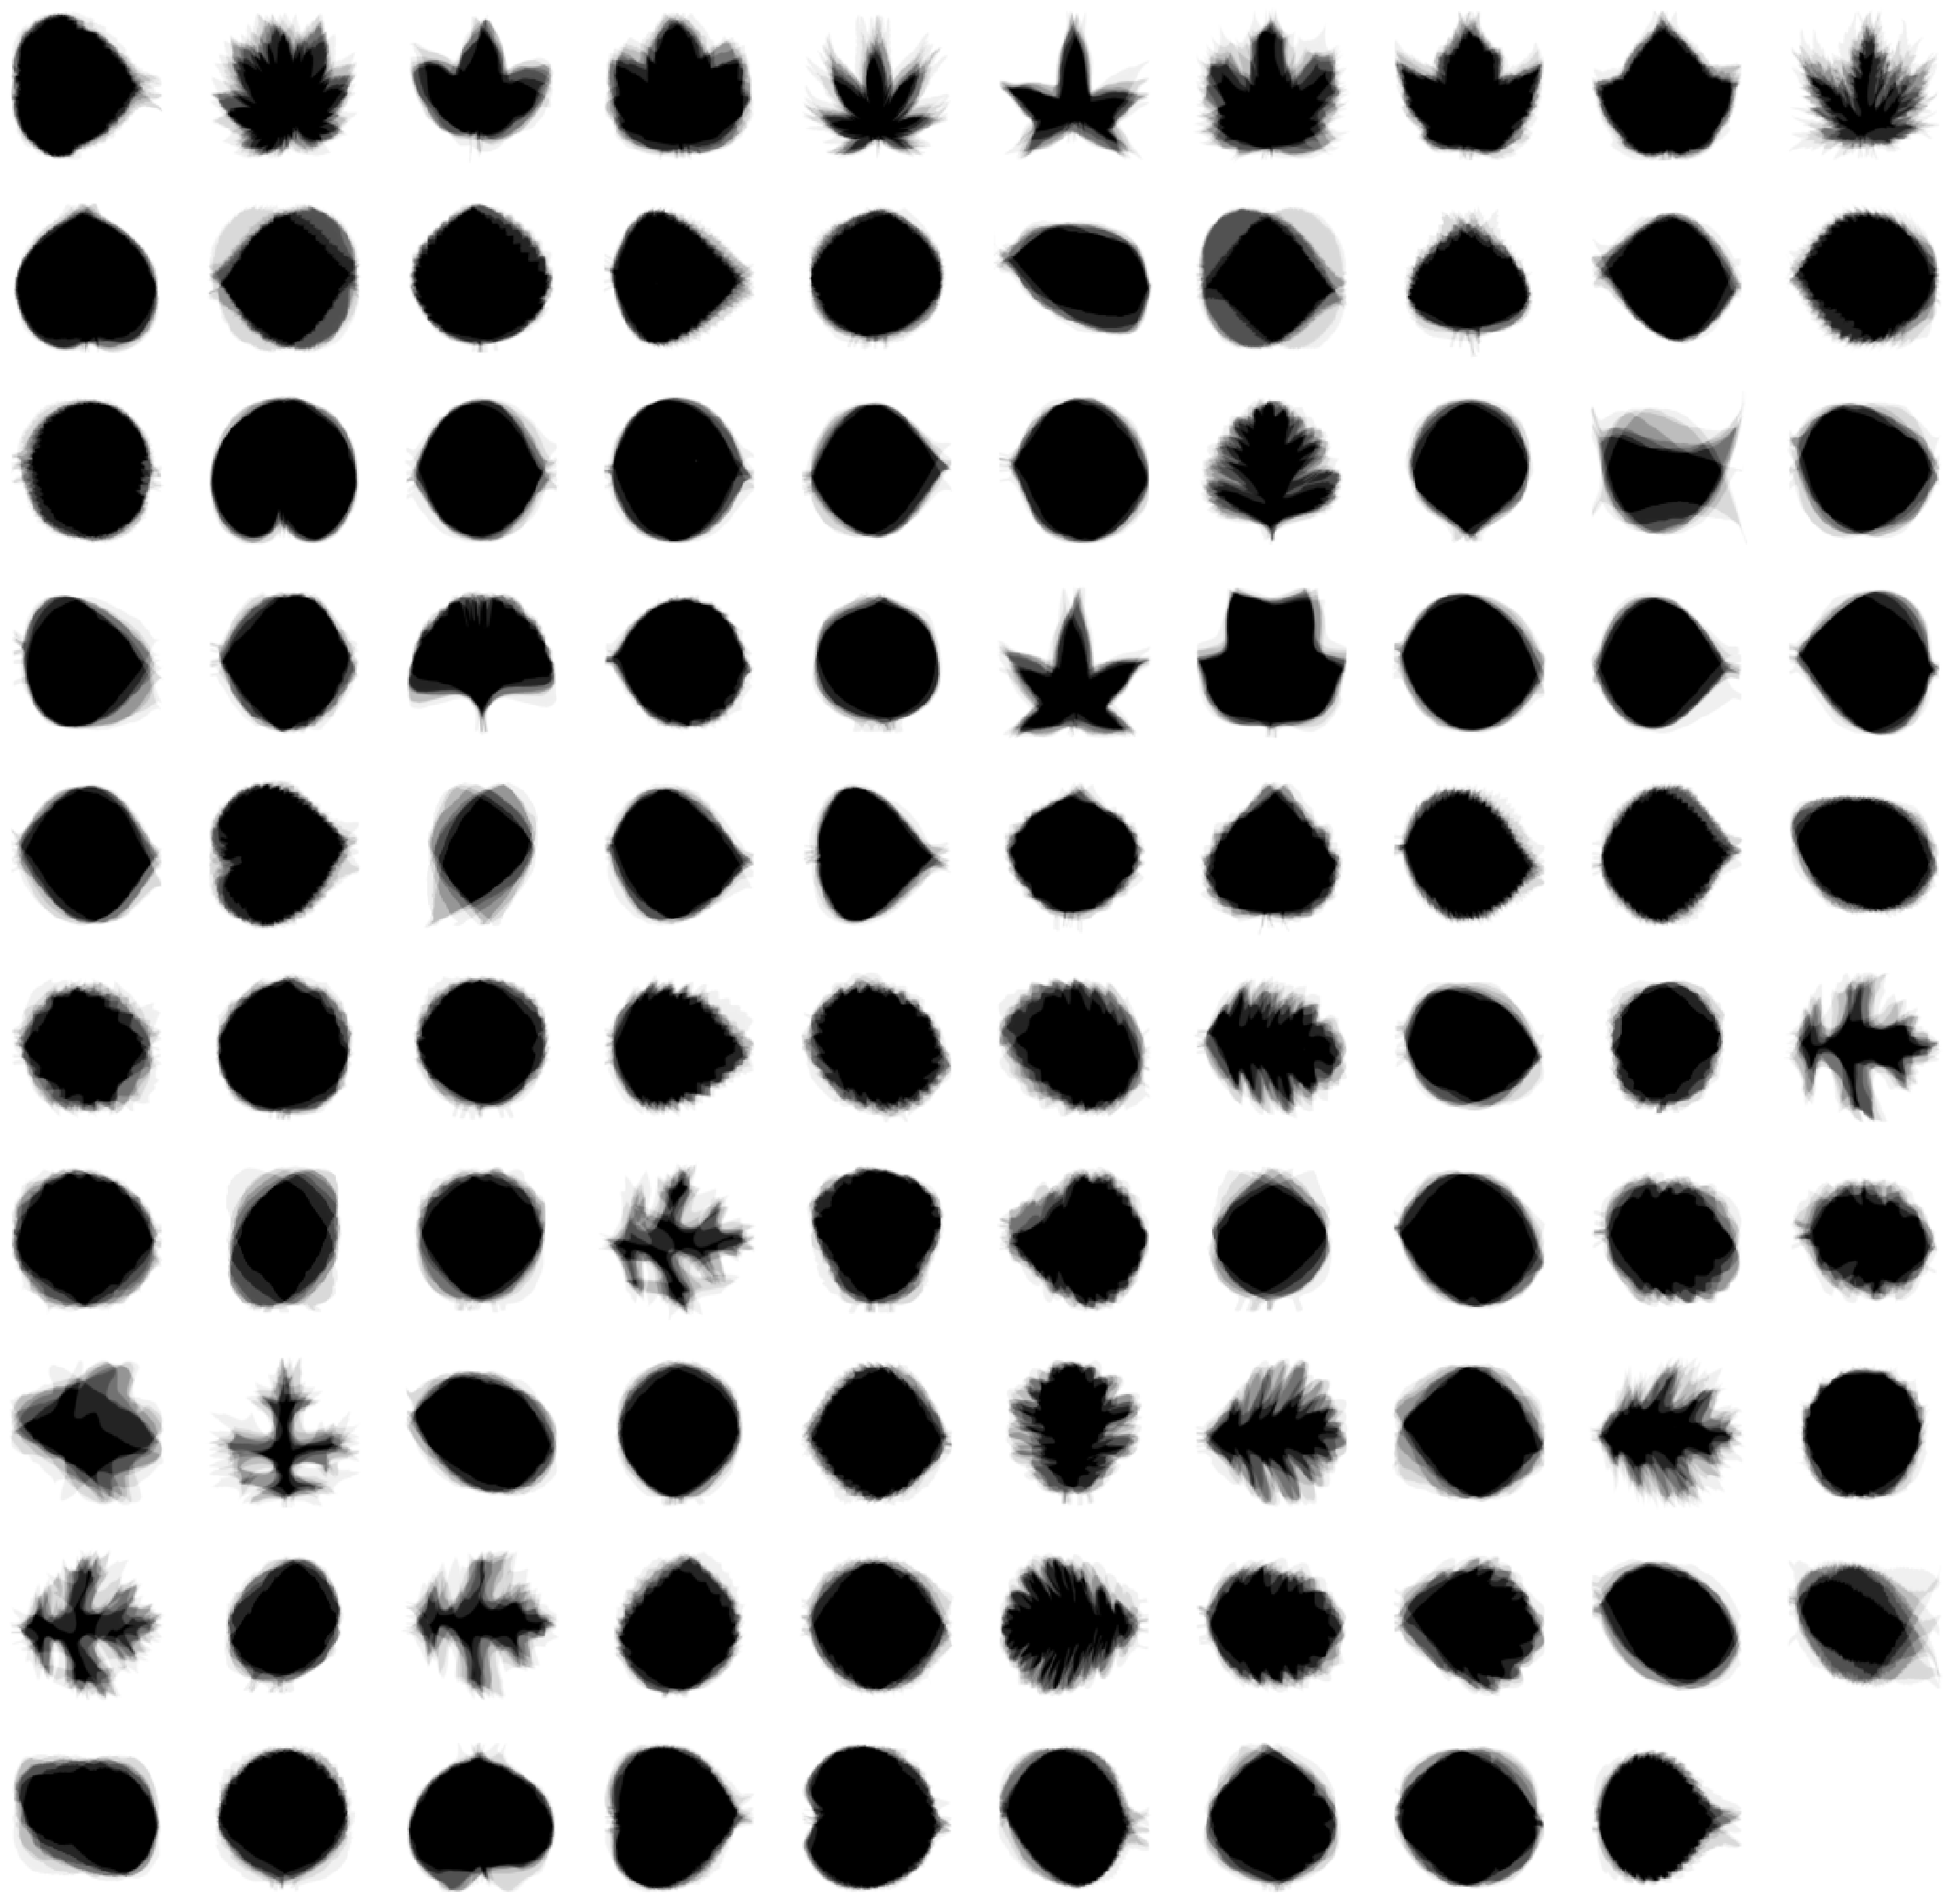

In [ ]:
centers=nc.centroids_
plt.figure(figsize=(40,40))
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(centers[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")
plt.show()

Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в документации sklearn. Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(imgs_train, y_train)
y_pred=mnb.predict(imgs_test)
accuracy_score(y_pred,y_test)

0.5

У MultinomialNB после обучения появляется атрибут feature_log_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.

In [ ]:
feat=mnb.feature_log_prob_

In [ ]:
feat.shape

(99, 10000)

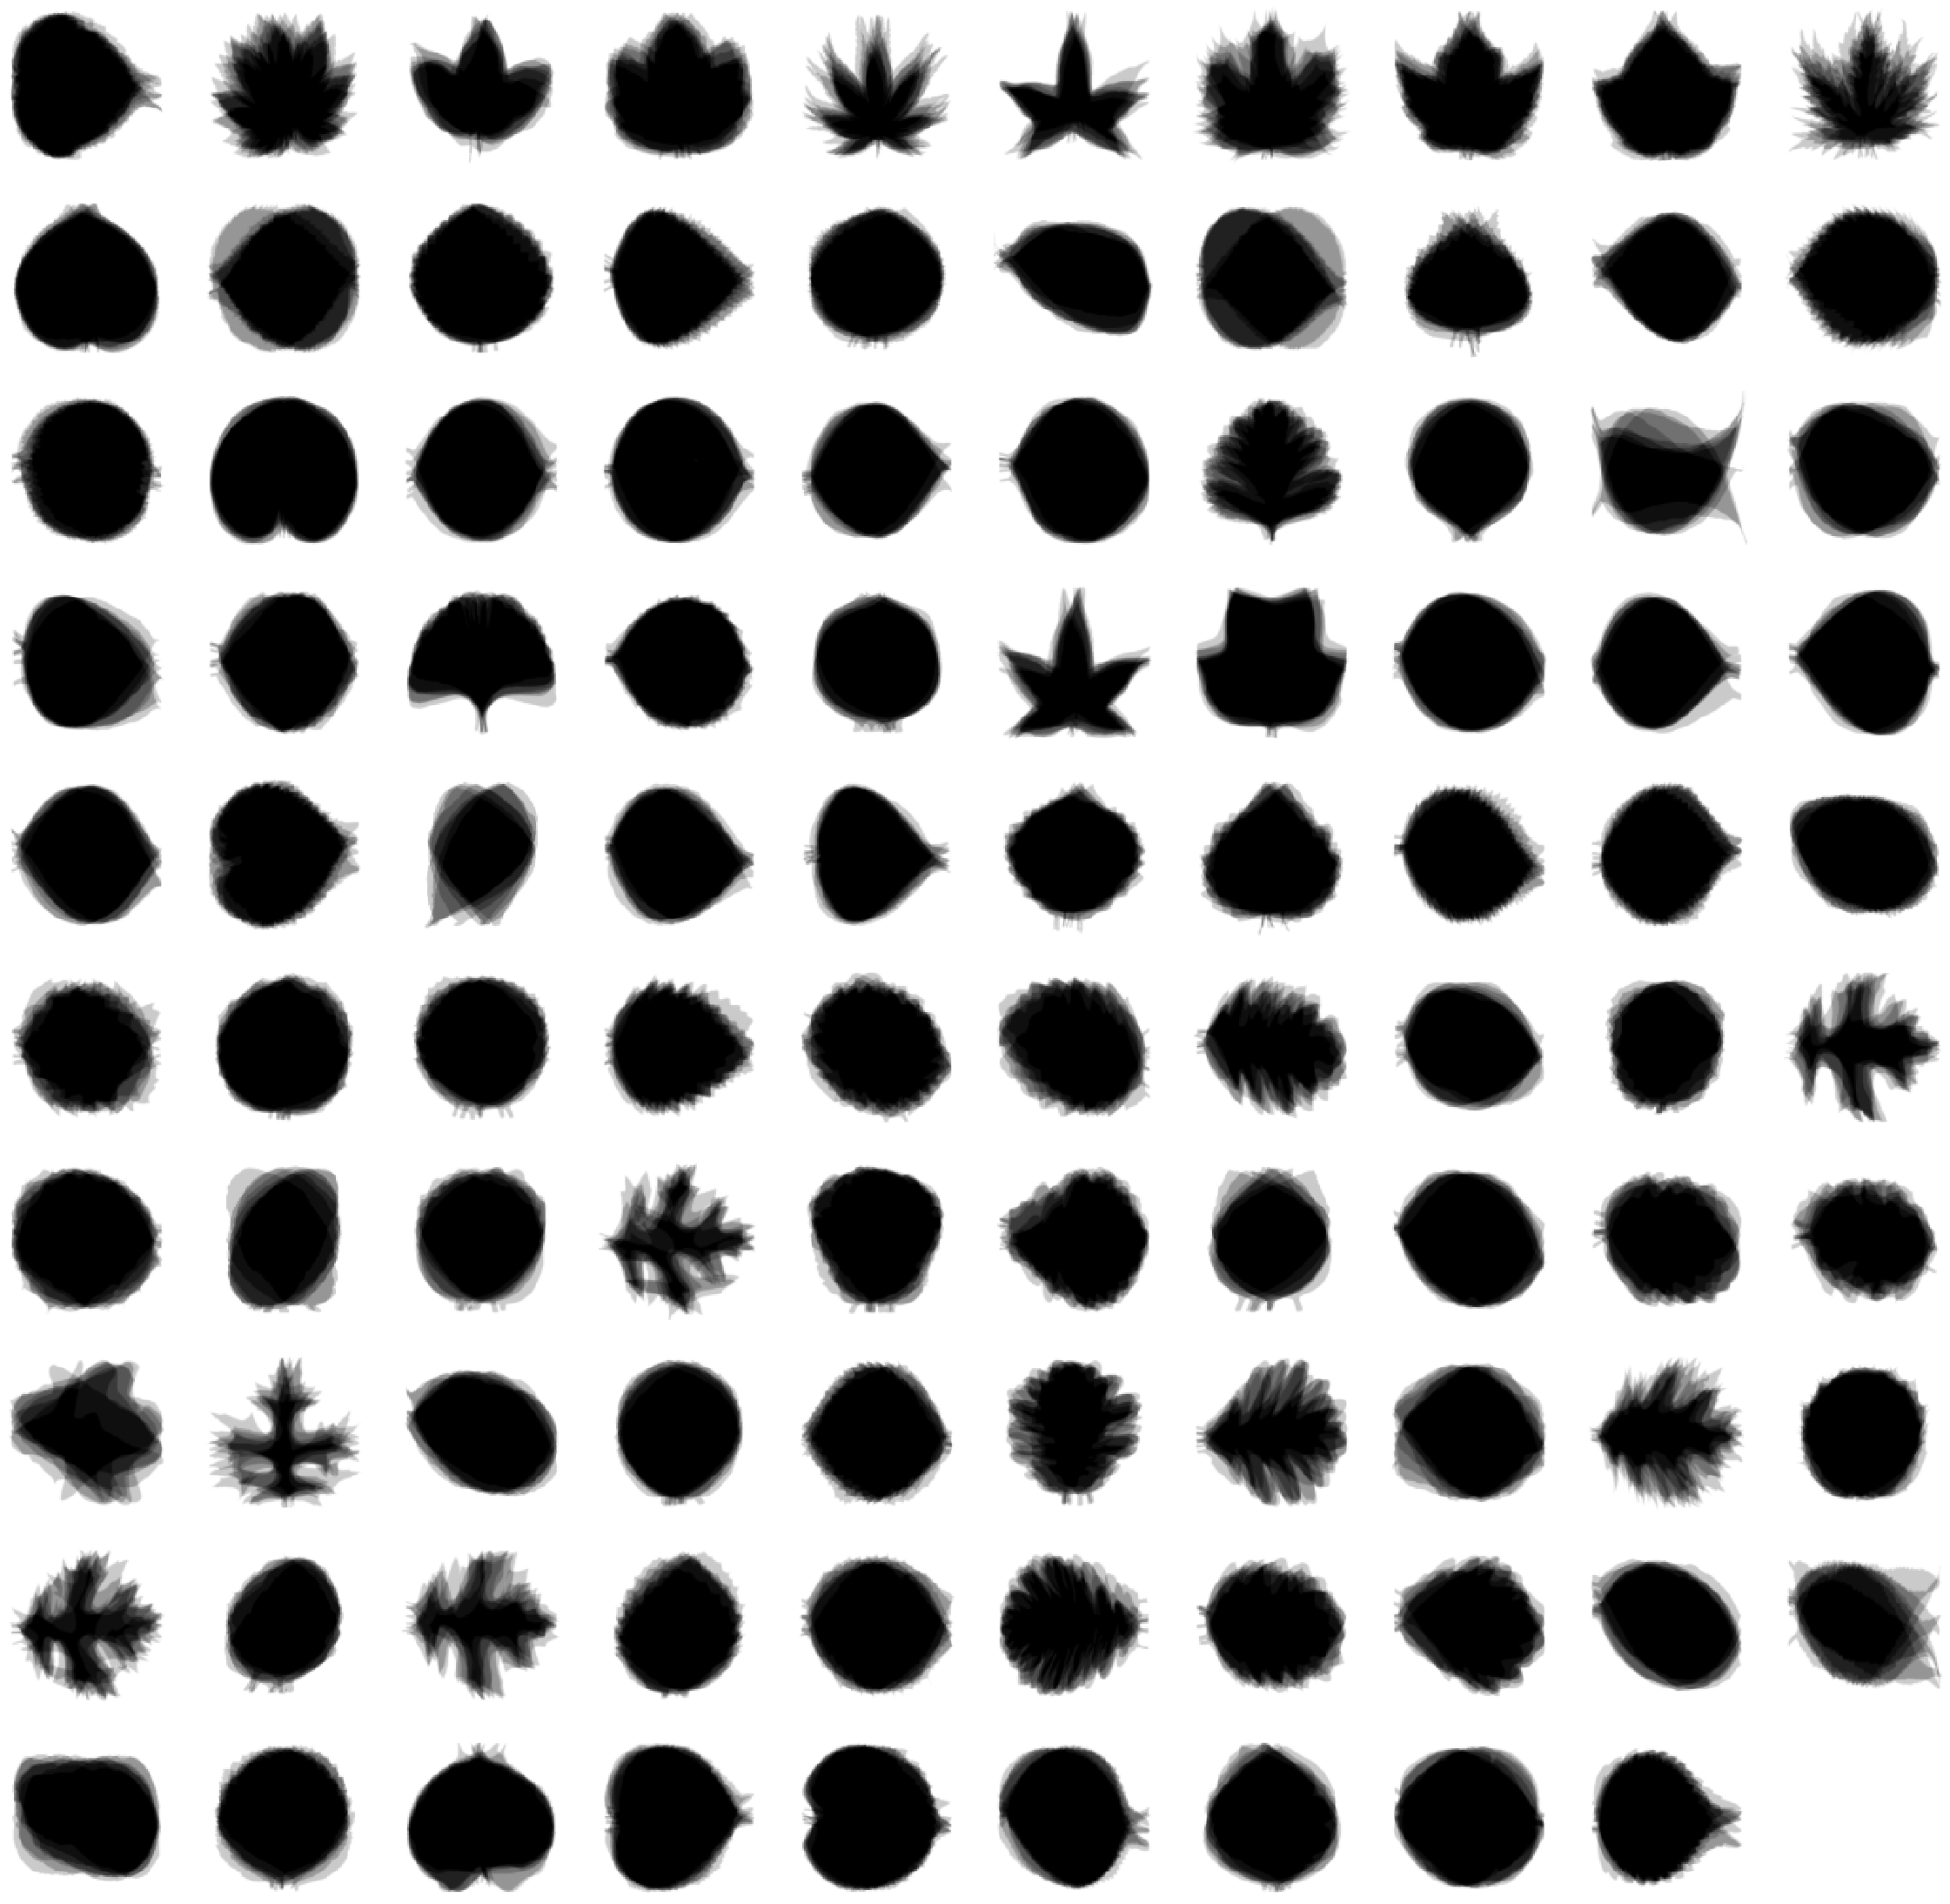

In [ ]:
plt.figure(figsize=(40,40))
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(feat[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")

Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(solver='lbfgs', max_iter=100, multi_class='auto', random_state=random_seed)
lg.fit(imgs_train, y_train)
y_pred=lg.predict(imgs_test)
accuracy_score(y_pred,y_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5909090909090909

Отобразите веса для каждого класса в виде картинки 100x100.

In [ ]:
coef=lg.coef_

In [ ]:
coef.shape

(99, 10000)

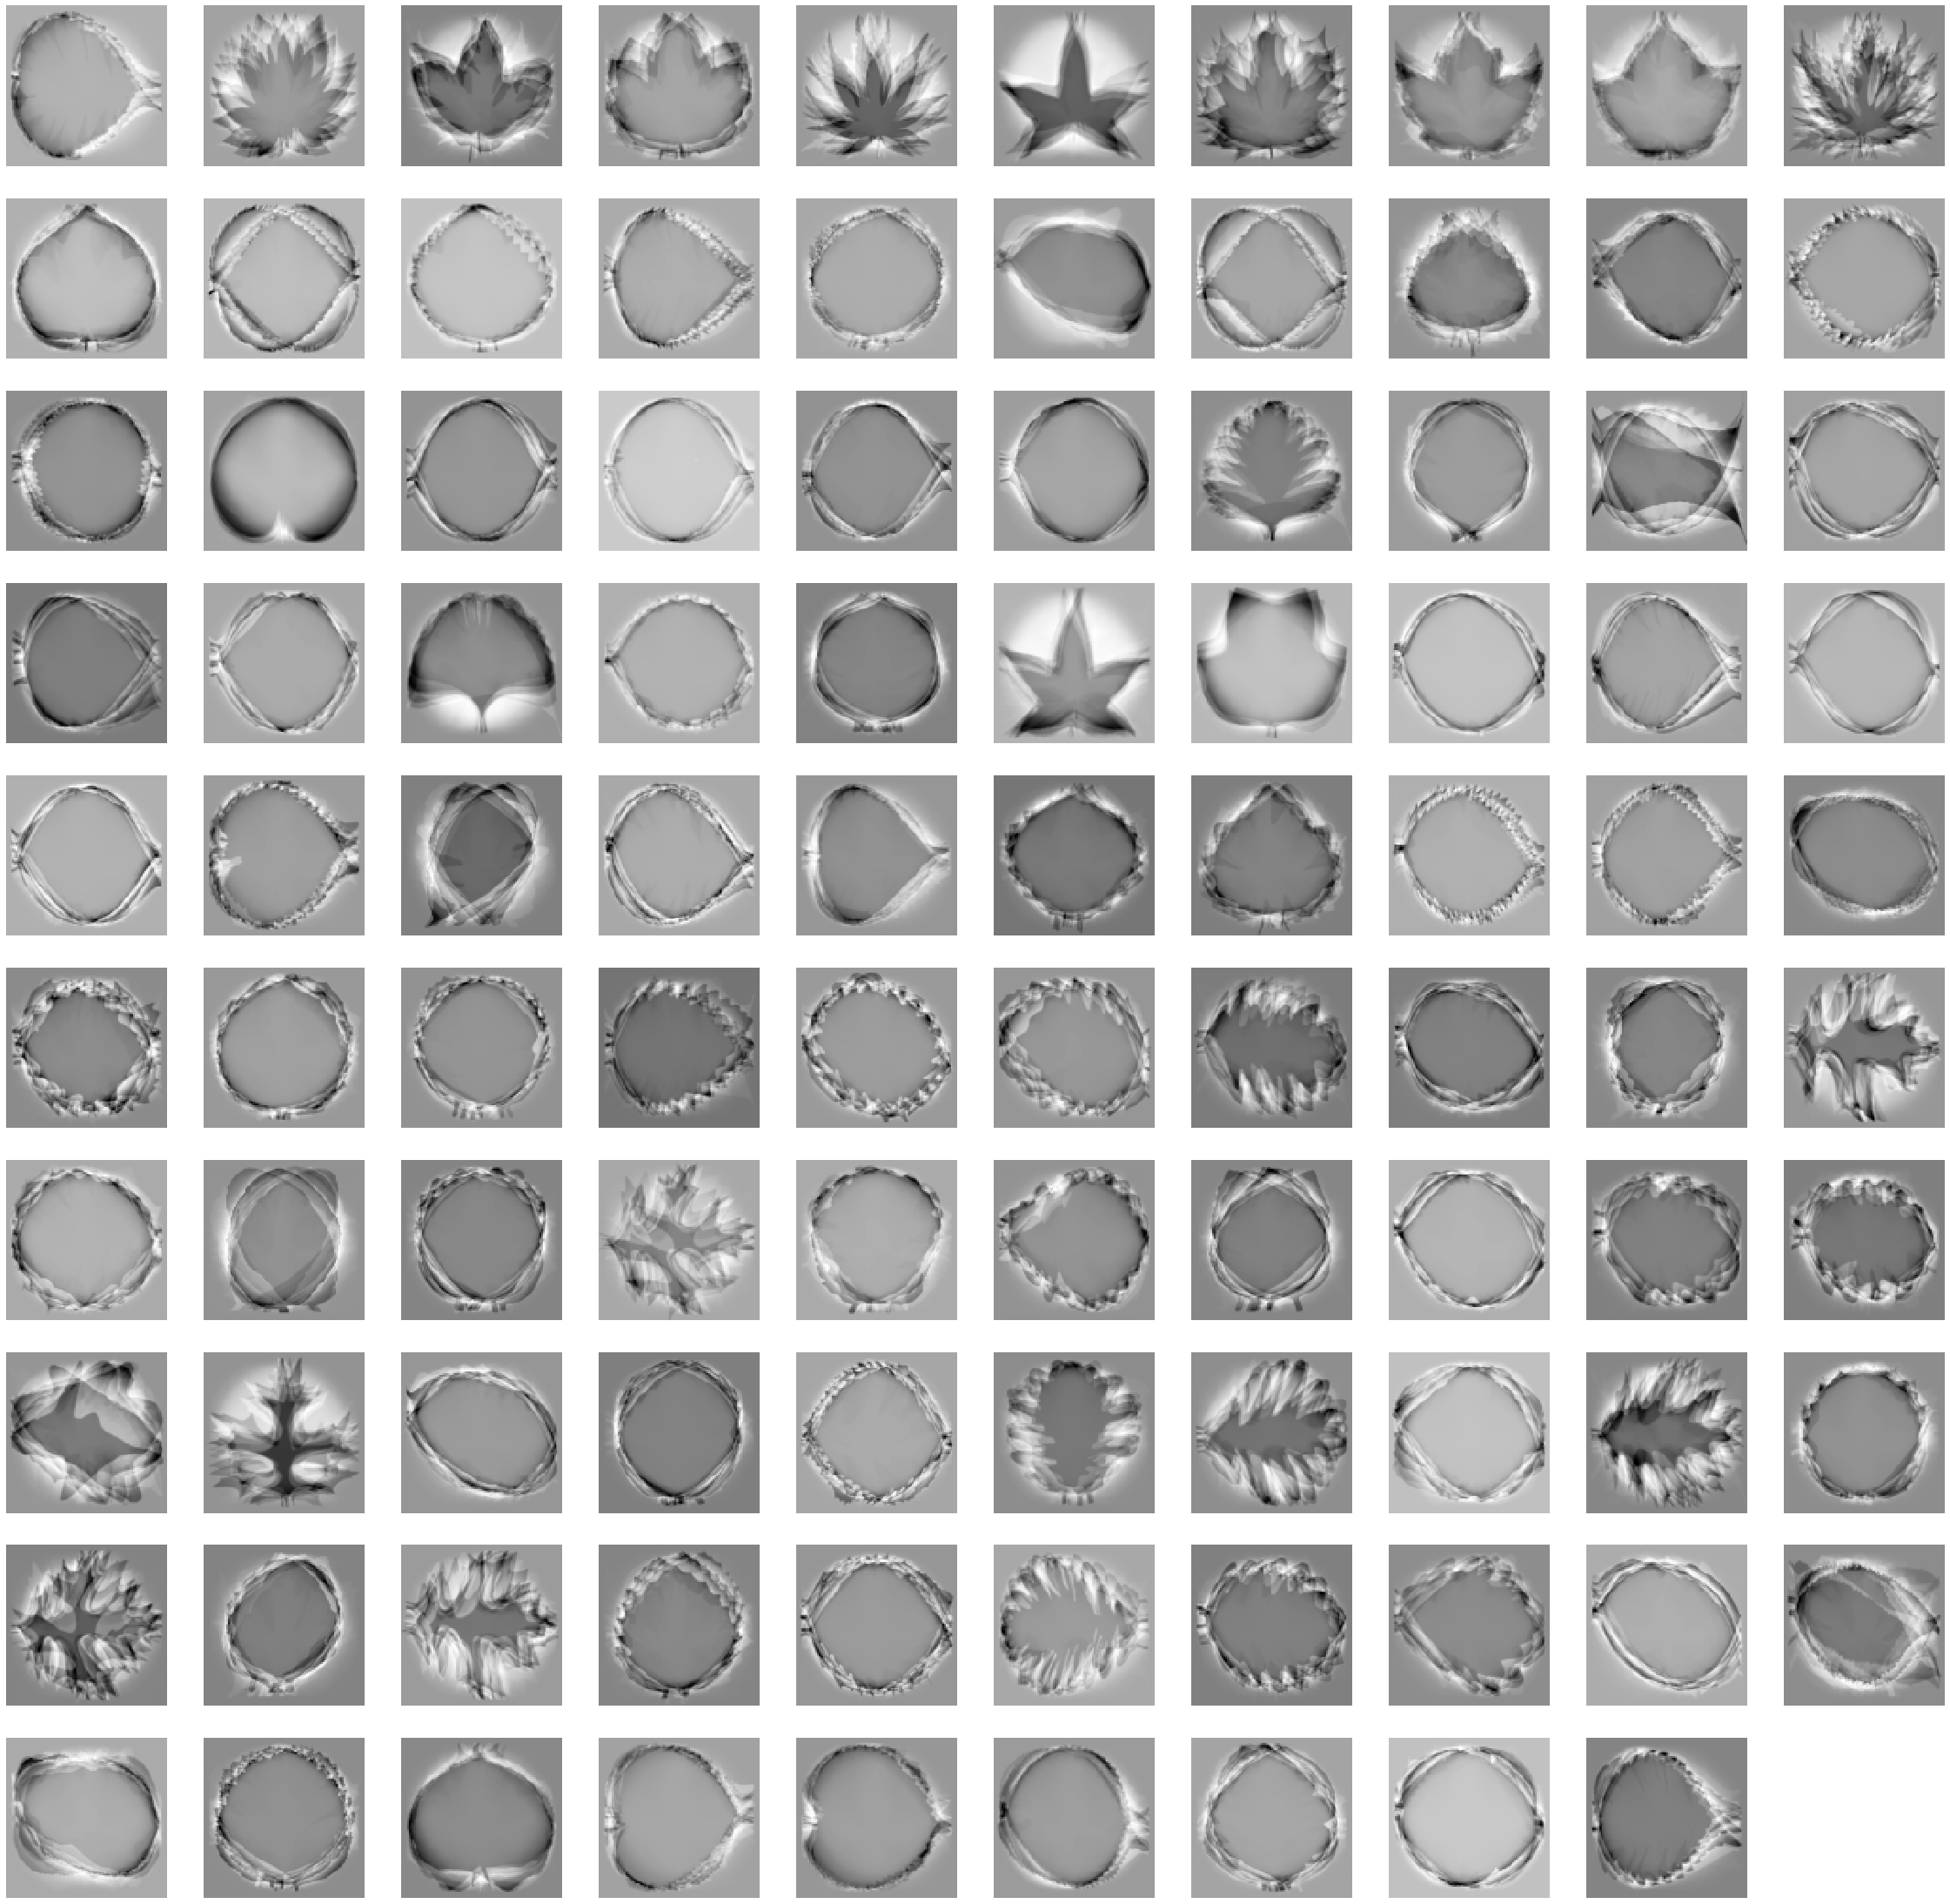

In [ ]:
plt.figure(figsize=(40,40))
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    plt.imshow(coef[i-1].reshape((100,100)), cmap='Greys')
    plt.grid(None)
    plt.axis("off")

**Ответы на вопросы:**

**Какой классификатор работает лучше? Предположите, почему.**  
По метрике accuracy_score (в данном случае она подходит так как у нас сбалансированная выборка) лучше классификатор - логистическая регрессия

**Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?**  
Центры и вероятности похожи на листья, только это более расплывчатые изображения, веса нет. 

**Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?**   
Веса линейного классификатора не различают области где признаки принимаяют константые 
значения (белые и черные), в этих областях веса в одном диапозоне, поэтому на картинках прорисовывается только граница листьев. Веса на границе принимают или большие значения (черные области) или наоборот маленькие (белые области) 

## Случайный лес (0.25 балла код + 0.25 балла выводы)

Настройте случайный лес на изображениях. Выведите качество на контроле

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=random_seed)
rf.fit(imgs_train,y_train)
y_pred=rf.predict(imgs_test)
accuracy_score(y_pred,y_test)

0.5252525252525253

In [ ]:
feat=rf.feature_importances_

In [ ]:
feat.shape

(10000,)

Отобразите feature_importances_ в виде картинки 100x100.

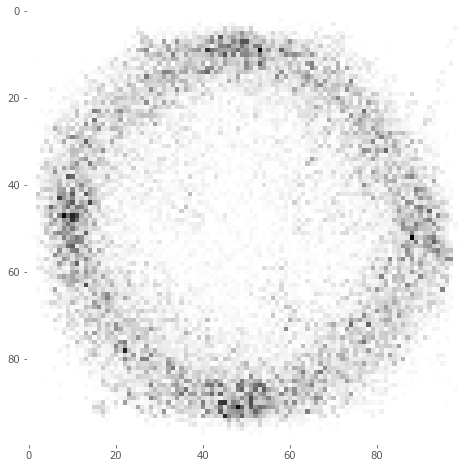

In [ ]:
plt.imshow(feat.reshape((100,100)), cmap='Greys')
plt.grid(None)
plt.show()

**Ответы на вопросы:**

**похожа ли картинка на изображение листа?**  
Нет

**соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).**  
Да, всего важнее признаки, которые соответствуют границам листьев, то есть те где больше стандартое отклонение, области с константыми признаками (отклонение близко к 0) не имеют особой важности для алгоритма, потому что если использовать их как предикаты, почти вся (или вся выборка) уйдет в одну из дочерних вершин, то есть разделения как таког оне произойдет.

# 4. Feature engeneering and selection

## Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)

Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле.

In [ ]:
num_components = 2**np.arange(10)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(random_state=random_seed)
rf=RandomForestClassifier(n_estimators=100,random_state=random_seed)
score_train = []
score_test = []
for n in num_components:
    pca.n_components=n
    x_train=pca.fit_transform(imgs_train)
    x_test=pca.transform(imgs_test)
    rf.fit(x_train,y_train)
    score_train.append(rf.score(x_train, y_train))
    score_test.append(rf.score(x_test, y_test))

Для RF на исходных признаках выведите качество и на контроле, и на обучении.

In [ ]:
rf.fit(imgs_train,y_train)
score_train0=rf.score(imgs_train, y_train)
score_test0=rf.score(imgs_test, y_test)
print('Качество на train на исходных данных: ',score_train0)
print('Качество на test на исходных данных: ',score_test0)

Качество на train на исходных данных:  1.0
Качество на test на исходных данных:  0.5252525252525253


На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

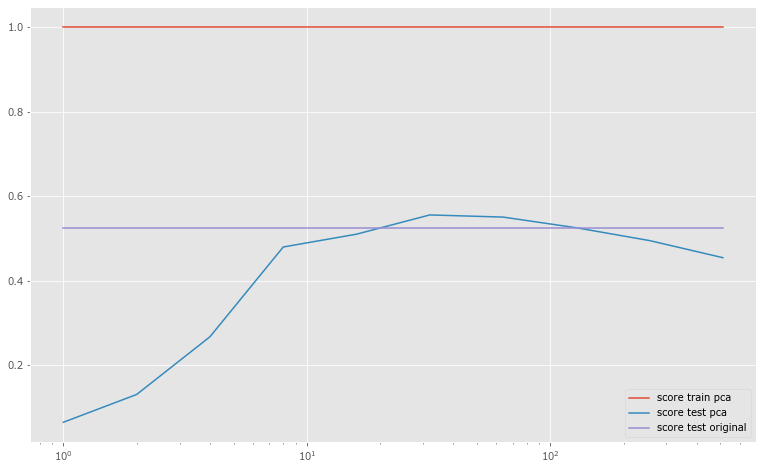

In [ ]:
plt.figure(figsize=(13,8))
plt.plot(num_components, score_train, label='score train pca') 
plt.plot(num_components, score_test, label='score test pca') 
plt.plot(num_components, [score_test0]*len(num_components), label='score test original') 
plt.xscale("log")
plt.legend()
plt.show()

**Ответы на вопросы:**

**Можно ли сказать, что случайный лес переобучается?**
Переобучается в плане, что 10000 признаков много, и он может работать лучше на меньшем количестве признаков, полученных из исходных 10000, я думаю да, потому что из графика видно, что такое же качесвто можно достичь и на меньшем числе компонет.

**Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?**  
Да, максимальное качество достигается при 32 компонентах, качество на несколько сотых больше, чем на всех признаках, не сильно.

## Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
print('Качество на test на исходных данных: ',rf.score(X_test, y_test))

Качество на test на исходных данных:  0.9848484848484849


Получился почти идеальный классификатор, качество увеличилось значительно, я думаю это связано с тем, что табличные данные представляют болле точную информацию о листьях, а изображения пришлось приводить к одному размеру, что привело к потере данных,
фактически мы изменяли форму листьев, то есть некоторые изображения  листьев разных классов могли стать более похожими при приведении к одному размеру.

# Бонусное задание (2 балла): Настройка гиперпараметров случайного леса

С помощью GridSearchCV или RandomizedSearchCV подберите параметры для случайного леса для модели на табличных данных.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
rf=RandomForestClassifier(random_state=random_seed)

In [ ]:
param_grid = { 
    'n_estimators': range(50,300,50),
    'min_samples_leaf': range(1,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# это работает долго
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=StratifiedKFold(n_splits=4, random_state=random_seed))
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),

In [ ]:
CV_rf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 250}

In [ ]:
rf=RandomForestClassifier(random_state=random_seed, n_estimators=250,min_samples_leaf=2,max_features='auto',criterion='entropy')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print('Accuracy модели с лучшими параметрами:',accuracy_score(y_test,y_pred))

Accuracy модели с лучшими параметрами: 0.9646464646464646


Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [ ]:
print('Индексы элеметов, на которых модель ошиблась:', *np.where(y_test!=y_pred))

Индексы элеметов, на которых модель ошиблась: [  9  36  54  78  90 162 193]


Возмем к примеру 36 объект

In [ ]:
print('Истинный класс этого листа: ',y_test[36])
print('Прндсказанный класс для этого листа: ',y_pred[36])

Истинный класс этого листа:  69
Прндсказанный класс для этого листа:  68


In [ ]:
print('Индексы элеметов' , y_pred[36], 'класса', *np.where(y_test==y_pred[36]))

Индексы элеметов 68 класса [ 28 162]


Теперь изобразим 36 и 28 объекты тестовой выборки, это будет истинное изображение листа и изображение предсказанного класса на этом листе. Пока отобразим их в приведенном к одному размеру виде.

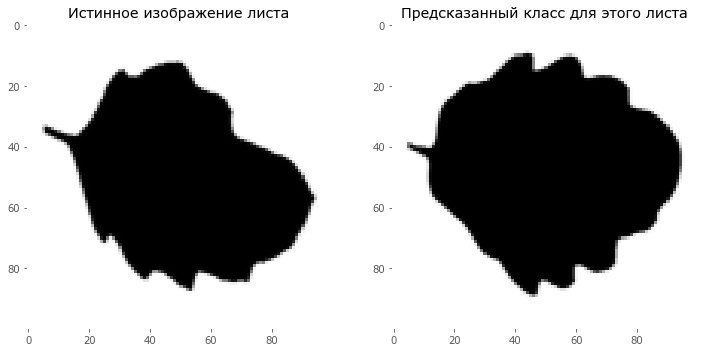

In [ ]:
plt.subplot(1,2,1)
plt.imshow(imgs_test[36].reshape((100,100)), cmap='Greys')
plt.grid(None)
plt.title('Истинное изображение листа')
plt.subplot(1,2,2)
plt.imshow(imgs_test[28].reshape((100,100)), cmap='Greys')
plt.grid(None)
plt.title('Предсказанный класс для этого листа')
plt.show()

Видно что листья достаточно сильно похожи

Теперь отобразим листья этих же классов, только такими какими они были в исходно виде. Для этого посмотрим индексы этих классов в табличных данных и с помощью ID откроем нужные файлы и отобразим листья

In [ ]:
print('Индексы элеметов 69 (истинный класс) класса:',*np.where(y==69))

Индексы элеметов 69 (истинный класс) класса: [ 42 112 205 294 527 595 623 726 905 953]


In [ ]:
print('Индексы элеметов 68 (предсказанный класс) класса:',*np.where(y==68))

Индексы элеметов 68 (предсказанный класс) класса: [405 526 552 578 690 775 780 829 833 845]


Изобразим 42 и 405 листья

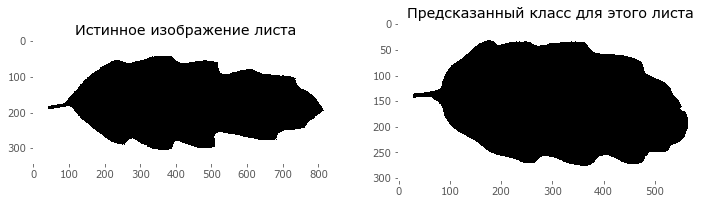

In [ ]:
plt.subplot(1,2,1)
plt.title('Истинное изображение листа')
filepath = os.path.join(IMG_DIR, str(ID[42])+'.jpg')
img = plt.imread(filepath)
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.subplot(1,2,2)
plt.title('Предсказанный класс для этого листа')
filepath = os.path.join(IMG_DIR, str(ID[405])+'.jpg')
img = plt.imread(filepath)
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.show()

В исходном виде листья тоже похожи

Проделаем все тоже самое для 162 листа

In [ ]:
print('Истинный класс этого листа: ',y_test[162])
print('Предсказанный класс для этого листа: ',y_pred[162])

Истинный класс этого листа:  68
Предсказанный класс для этого листа:  31


In [ ]:
print('Индексы элеметов' , y_pred[162], 'класса', *np.where(y_test==y_pred[162]))

Индексы элеметов 31 класса [108 175]


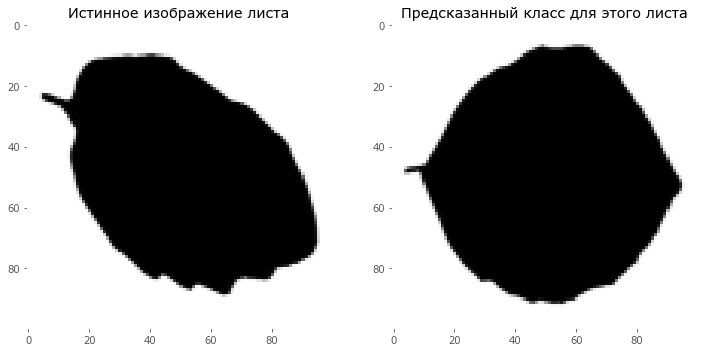

In [ ]:
plt.subplot(1,2,1)
plt.imshow(imgs_test[162].reshape((100,100)), cmap='Greys')
plt.grid(None)
plt.title('Истинное изображение листа')
plt.subplot(1,2,2)
plt.imshow(imgs_test[108].reshape((100,100)), cmap='Greys')
plt.grid(None)
plt.title('Предсказанный класс для этого листа')
plt.show()

В таком формате листья опять похожи визуально

In [ ]:
print('Индексы элеметов 68 (истинный класс) класса:',*np.where(y==68))

Индексы элеметов 68 (истинный класс) класса: [405 526 552 578 690 775 780 829 833 845]


In [ ]:
print('Индексы элеметов 31 (предсказанный класс) класса:',*np.where(y==31))

Индексы элеметов 31 (предсказанный класс) класса: [ 15  29 147 195 263 315 379 476 747 804]


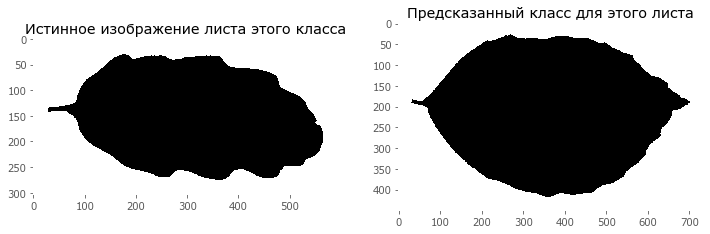

In [ ]:
plt.subplot(1,2,1)
plt.title('Истинное изображение листа этого класса')
filepath = os.path.join(IMG_DIR, str(ID[405])+'.jpg')
img = plt.imread(filepath)
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.subplot(1,2,2)
plt.title('Предсказанный класс для этого листа')
filepath = os.path.join(IMG_DIR, str(ID[15])+'.jpg')
img = plt.imread(filepath)
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.show()

В исходном формате листья уже не так сильно похожи